### <font color='red'> Predicting Type of Cancer. </font>

![](https://www.sciencealert.com/images/2020-06/processed/cancer_topic_1024.jpg)

#### A data set indicating whether a cancer is benign or malignant according to its individual characteristics

#### Our data has 569 values and 33 columns, Here we will use the "cancer_data.csv" database that has been made available for use, below you will see an analysis of the data, the processing of that data and the use of machine learning classification models to achieve our goal.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cancer-data/Cancer_Data.csv


#### Importing Libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## <font color='blue'> 1. Importing Dataset. </font>

#### Here we are reading the database using the name "df" in the variable name.

In [3]:
df = pd.read_csv('/kaggle/input/cancer-data/Cancer_Data.csv', sep = ',')

#### Here we can see that we have categorical and continuous variables, we can also see that we don't have null values.

In [4]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [8]:
(df.isnull().sum()/len(df))

id                         0.0
diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
Unnamed:

#### let's delete the column Unnamed that won't be used.

In [10]:
df = df.drop('Unnamed: 32', axis = 1)

## <font color='blue'> 2. Daya Analysis. </font>

#### Verifying the correlation between our variables.
- Here we can see that our data has a great correlation between them, for now we will leave it.

<AxesSubplot:>

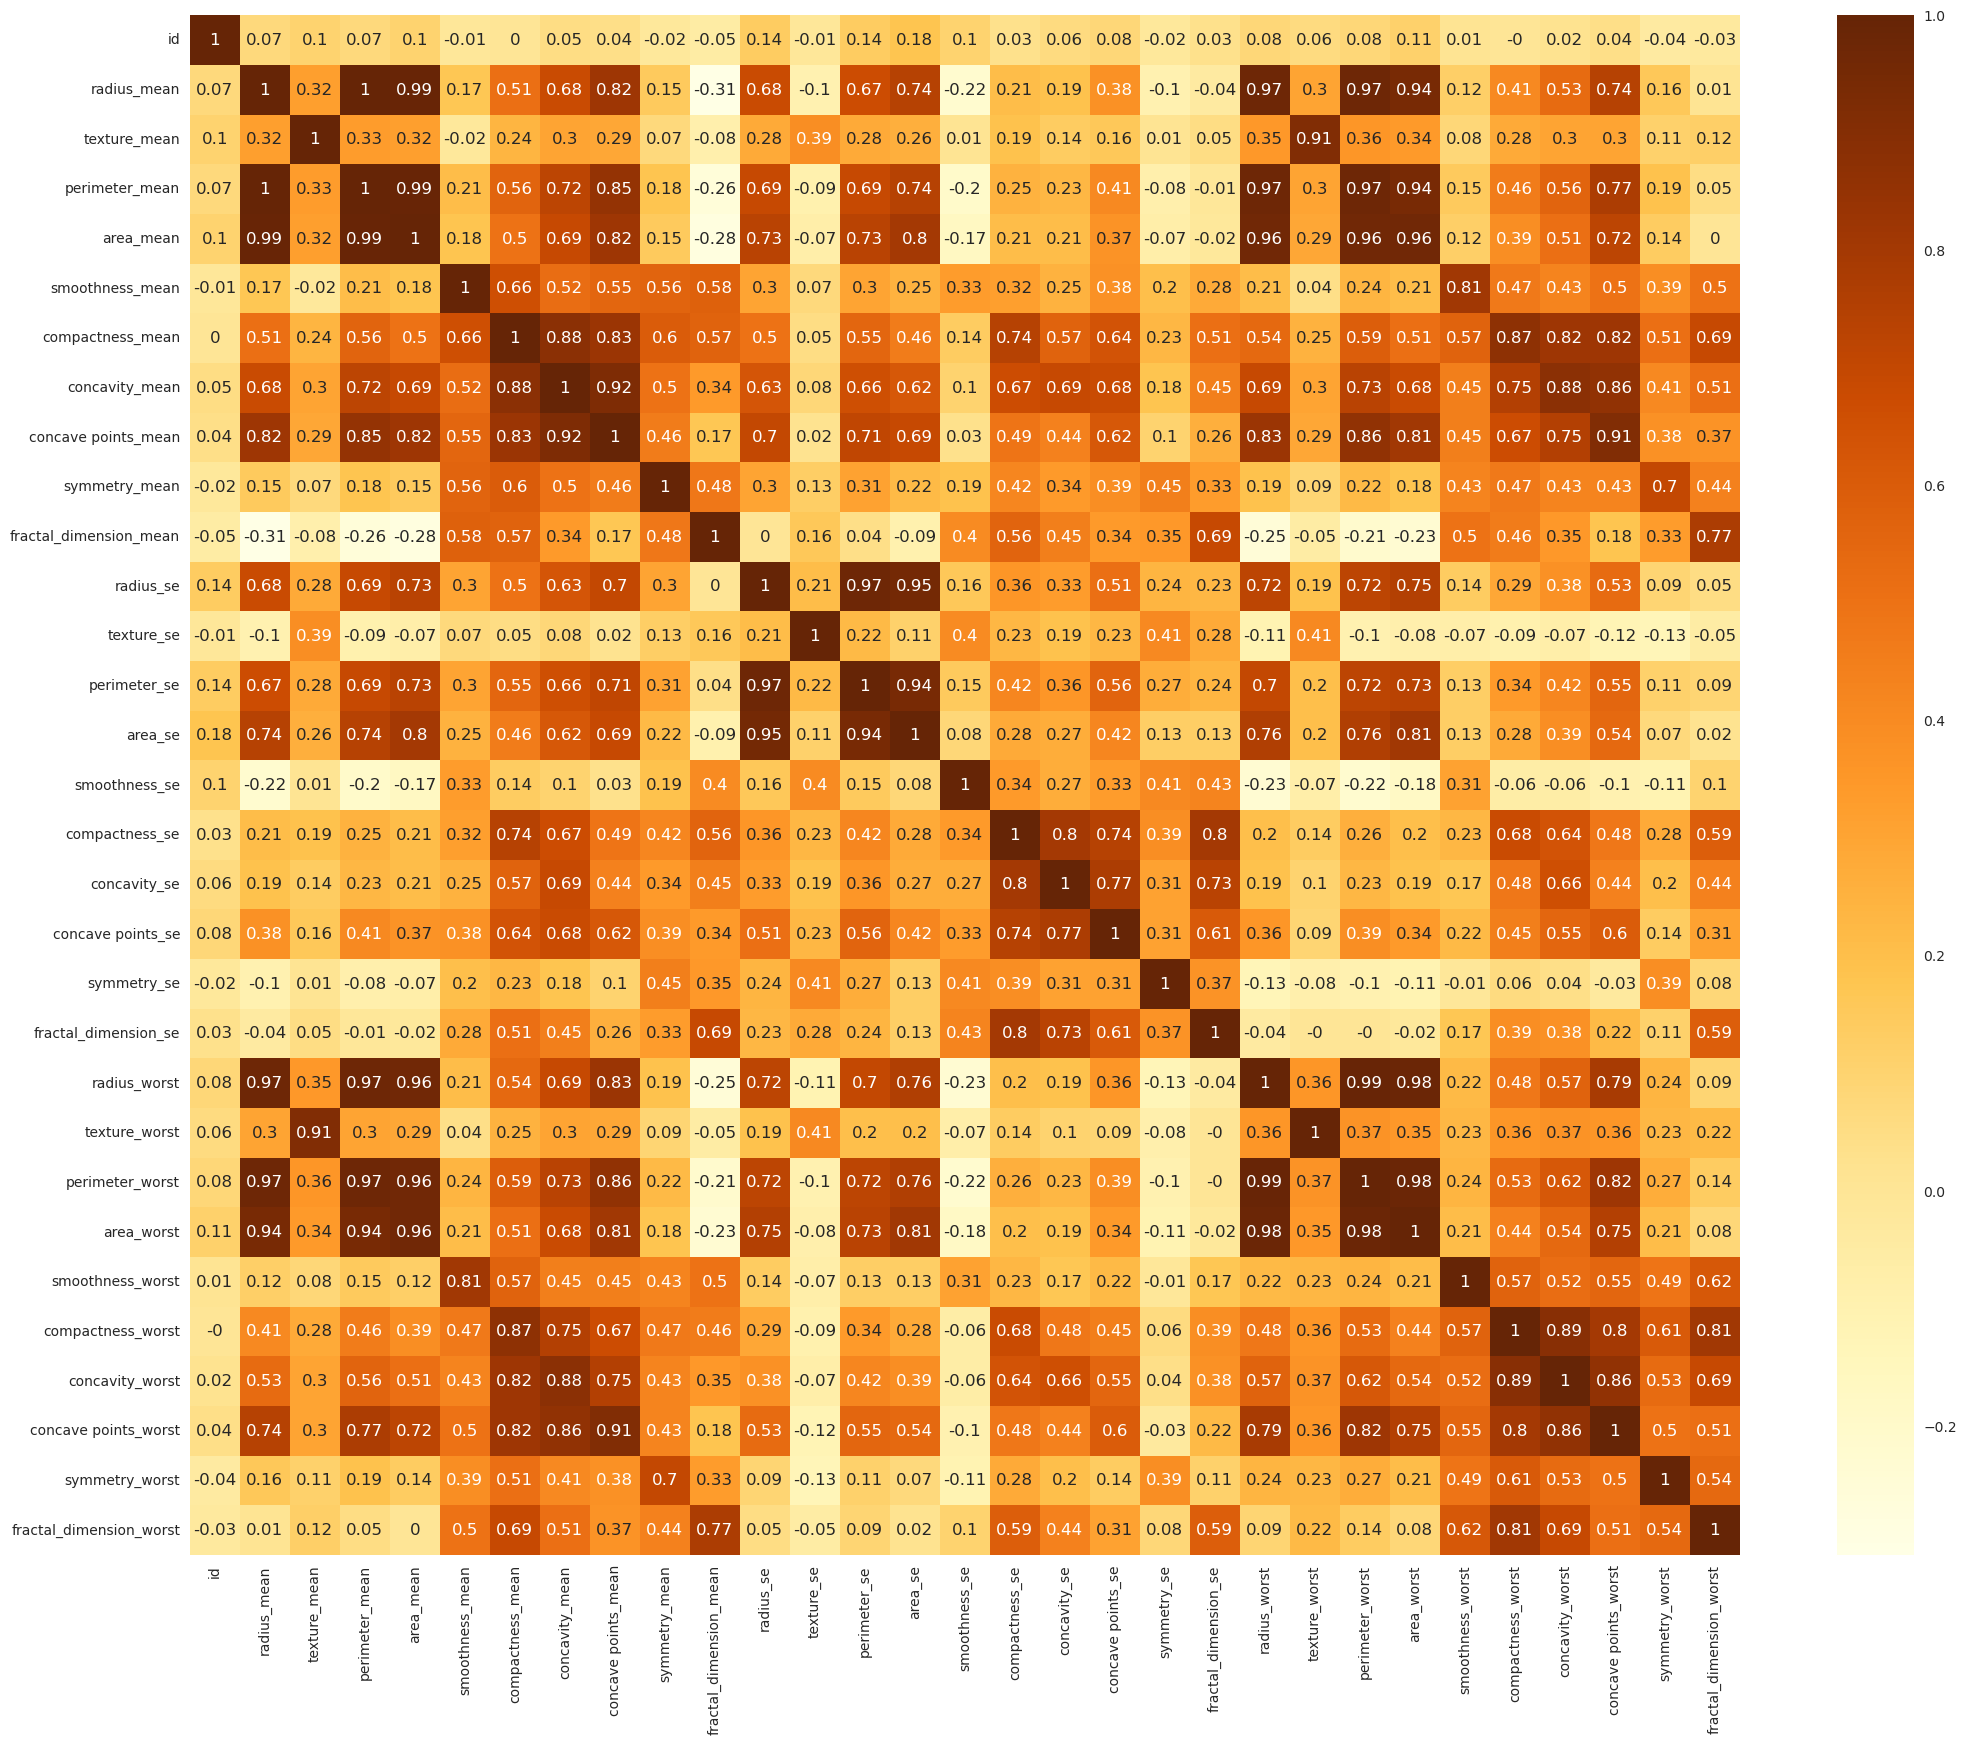

In [13]:
corr = df.corr().round(2)
plt.figure(figsize = (25,20))
sns.heatmap(corr, annot = True, cmap = 'YlOrBr')

#### Categorical Variables.

#### Looking at our target variable, we were able to verify that our database has more data of Benign value than Malignant, we can also verify that our base is not so unbalanced.

<AxesSubplot:title={'center':'Variable diagnosis'}, xlabel='diagnosis', ylabel='count'>

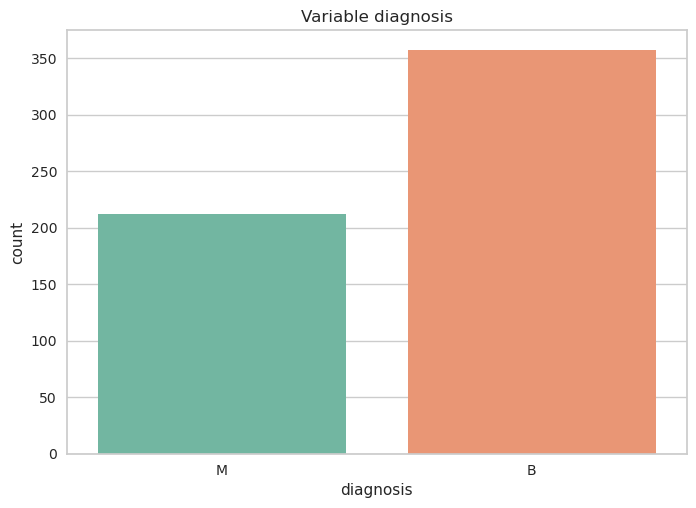

In [18]:
plt.gca().set_title('Variable diagnosis')
sns.countplot(x = 'diagnosis', palette = 'Set2', data = df)

#### Continuous Variables.

#### Here we can look at our continuous variables and we can verify that our data is already normalized.

<AxesSubplot:xlabel='fractal_dimension_mean', ylabel='Count'>

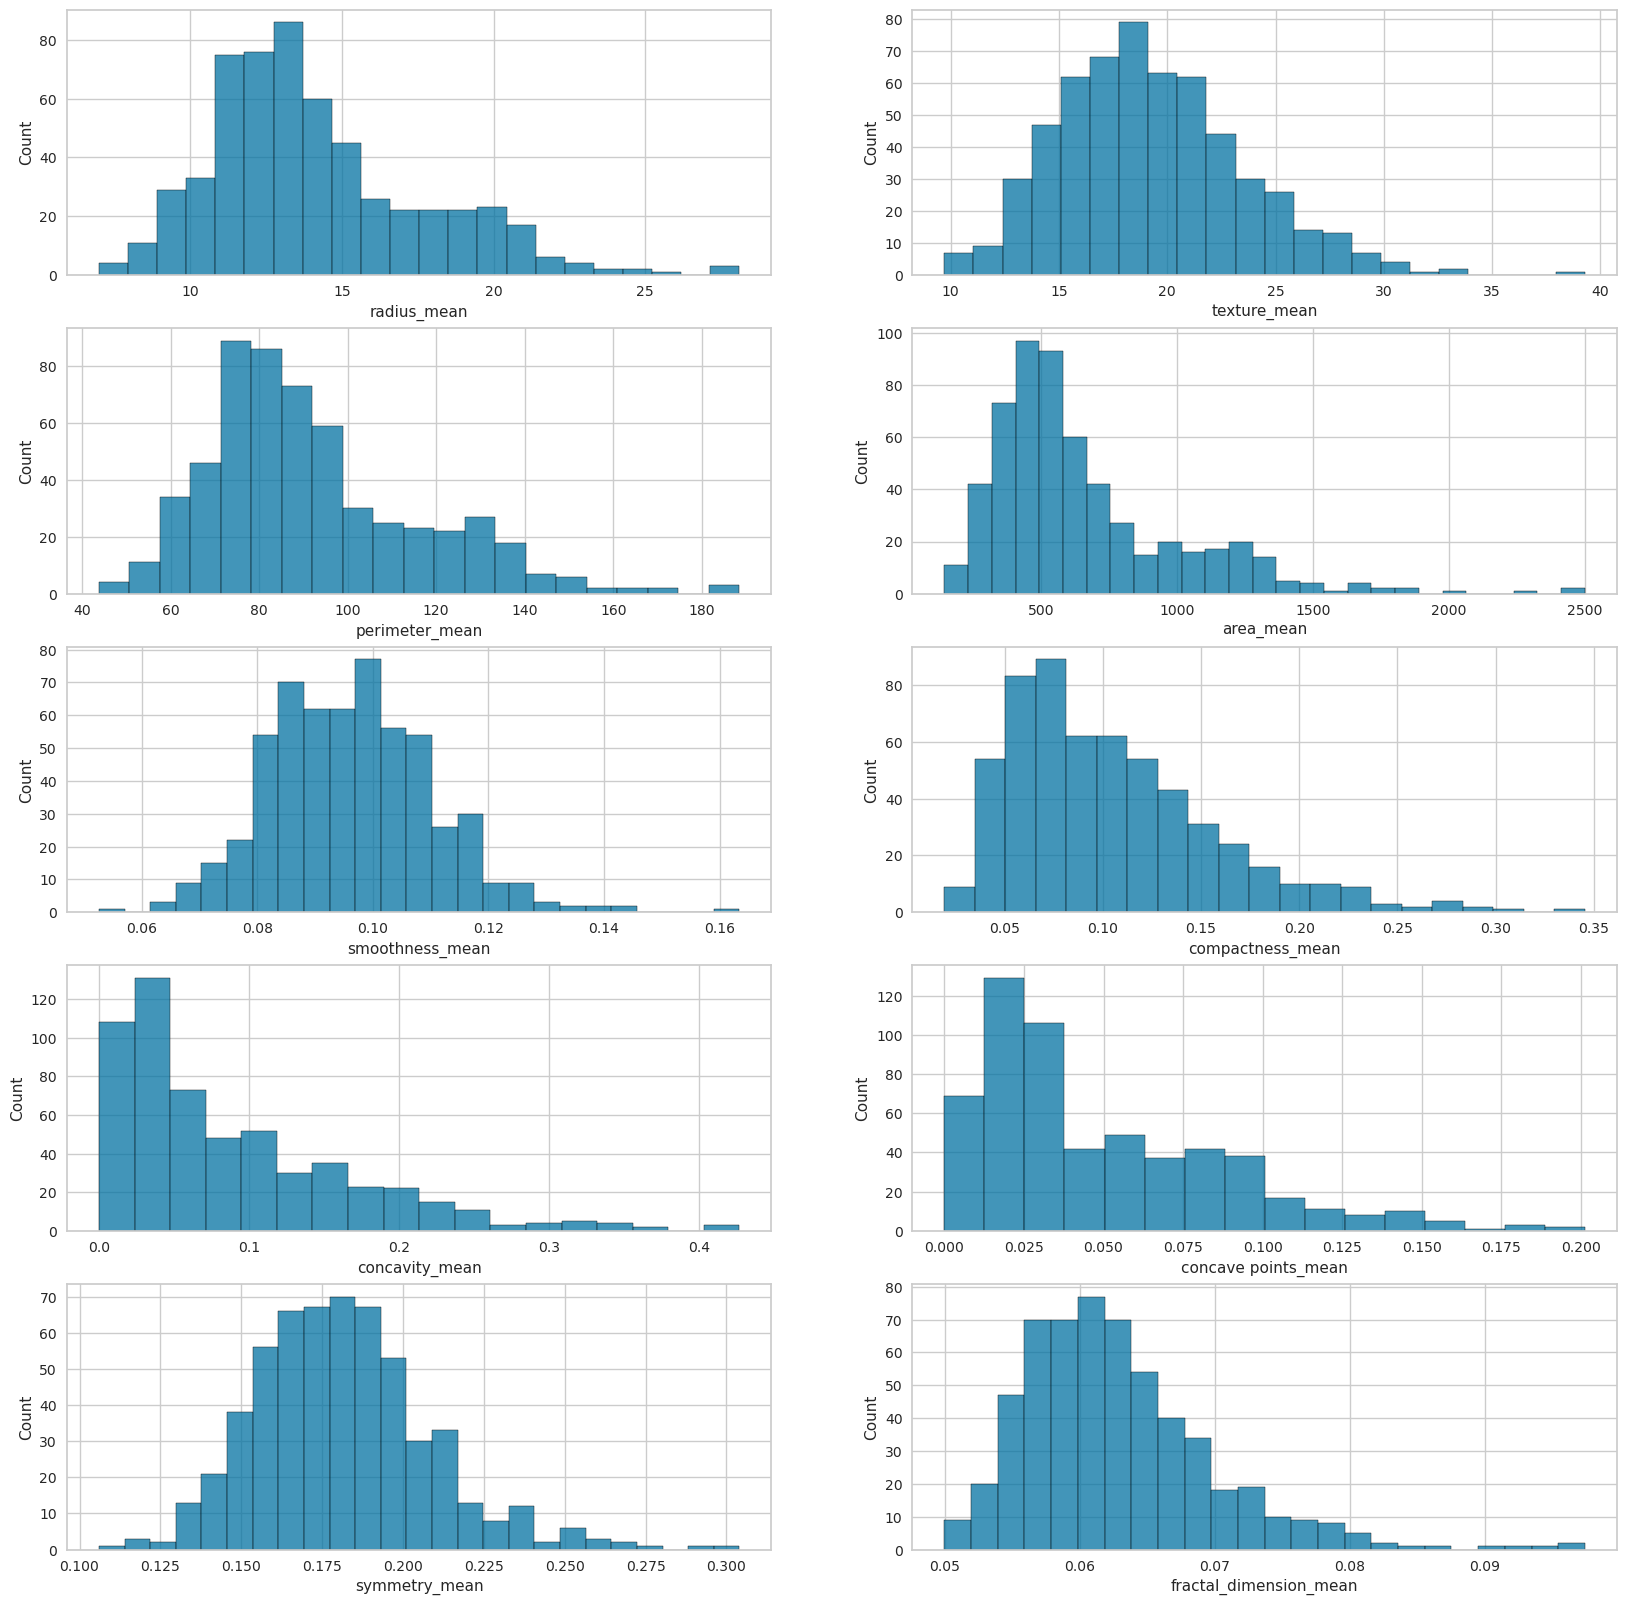

In [20]:
plt.figure(figsize = (20, 20))

plt.subplot(5, 2, 1)
sns.histplot(x = df['radius_mean'], kde = False)

plt.subplot(5, 2, 2)
sns.histplot(x = df['texture_mean'], kde = False)

plt.subplot(5, 2, 3)
sns.histplot(x = df['perimeter_mean'], kde = False)

plt.subplot(5, 2, 4)
sns.histplot(x = df['area_mean'], kde = False)

plt.subplot(5, 2, 5)
sns.histplot(x = df['smoothness_mean'], kde = False)

plt.subplot(5, 2, 6)
sns.histplot(x = df['compactness_mean'], kde = False)

plt.subplot(5, 2, 7)
sns.histplot(x = df['concavity_mean'], kde = False)

plt.subplot(5, 2, 8)
sns.histplot(x = df['concave points_mean'], kde = False)

plt.subplot(5, 2, 9)
sns.histplot(x = df['symmetry_mean'], kde = False)

plt.subplot(5, 2, 10)
sns.histplot(x = df['fractal_dimension_mean'], kde = False)

<AxesSubplot:xlabel='fractal_dimension_se', ylabel='Count'>

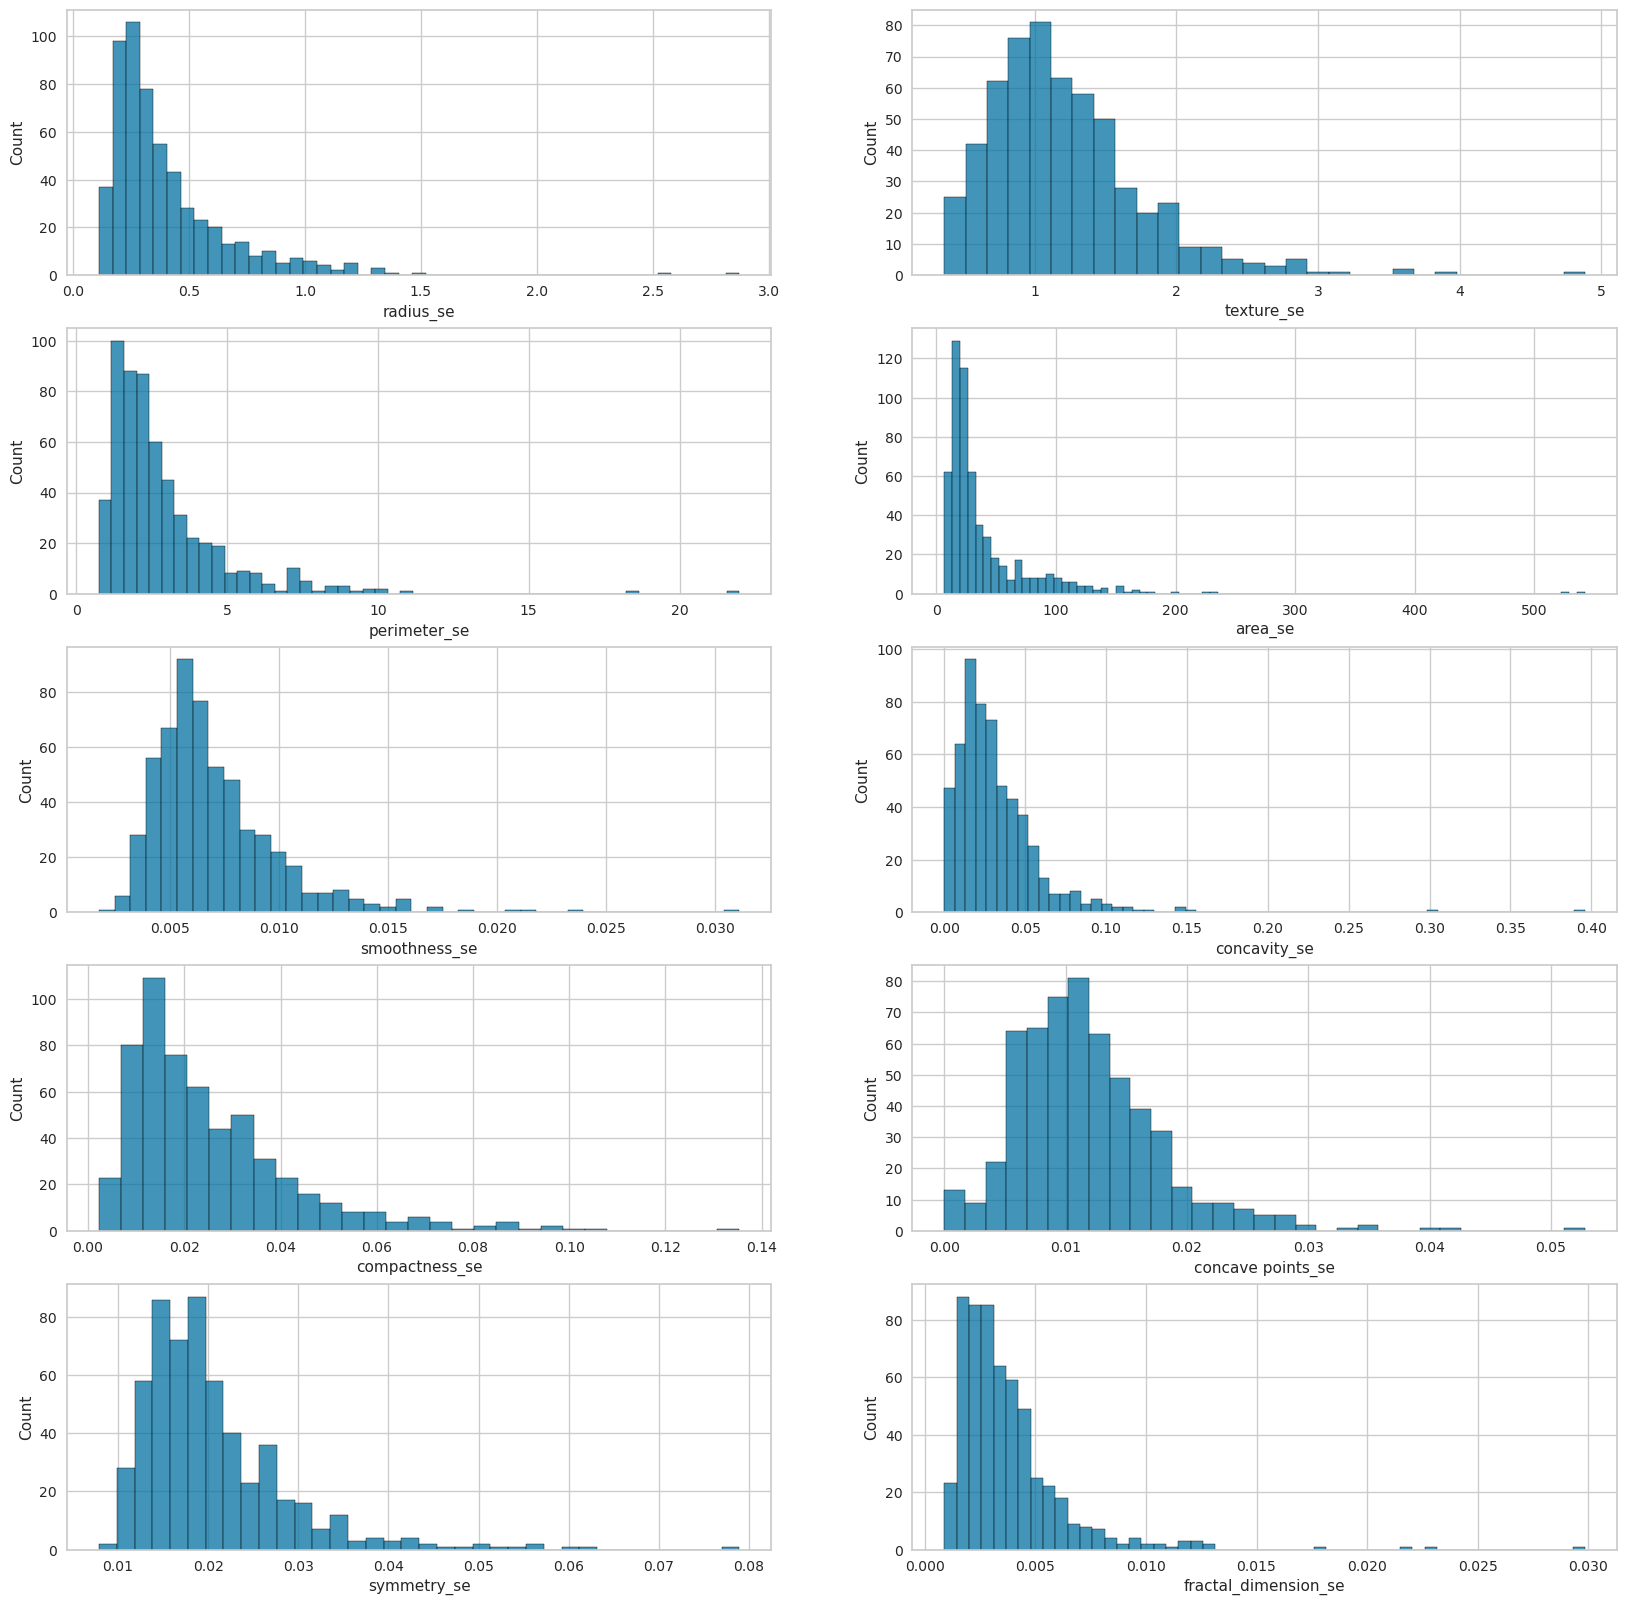

In [22]:
plt.figure(figsize = (20, 20))

plt.subplot(5, 2, 1)
sns.histplot(x = df['radius_se'], kde = False)

plt.subplot(5, 2, 2)
sns.histplot(x = df['texture_se'], kde = False)

plt.subplot(5, 2, 3)
sns.histplot(x = df['perimeter_se'], kde = False)

plt.subplot(5, 2, 4)
sns.histplot(x = df['area_se'], kde = False)

plt.subplot(5, 2, 5)
sns.histplot(x = df['smoothness_se'], kde = False)

plt.subplot(5, 2, 6)
sns.histplot(x = df['concavity_se'], kde = False)

plt.subplot(5, 2, 7)
sns.histplot(x = df['compactness_se'], kde = False)

plt.subplot(5, 2, 8)
sns.histplot(x = df['concave points_se'], kde = False)

plt.subplot(5, 2, 9)
sns.histplot(x = df['symmetry_se'], kde = False)

plt.subplot(5, 2, 10)
sns.histplot(x = df['fractal_dimension_se'], kde = False)

<AxesSubplot:xlabel='fractal_dimension_worst', ylabel='Count'>

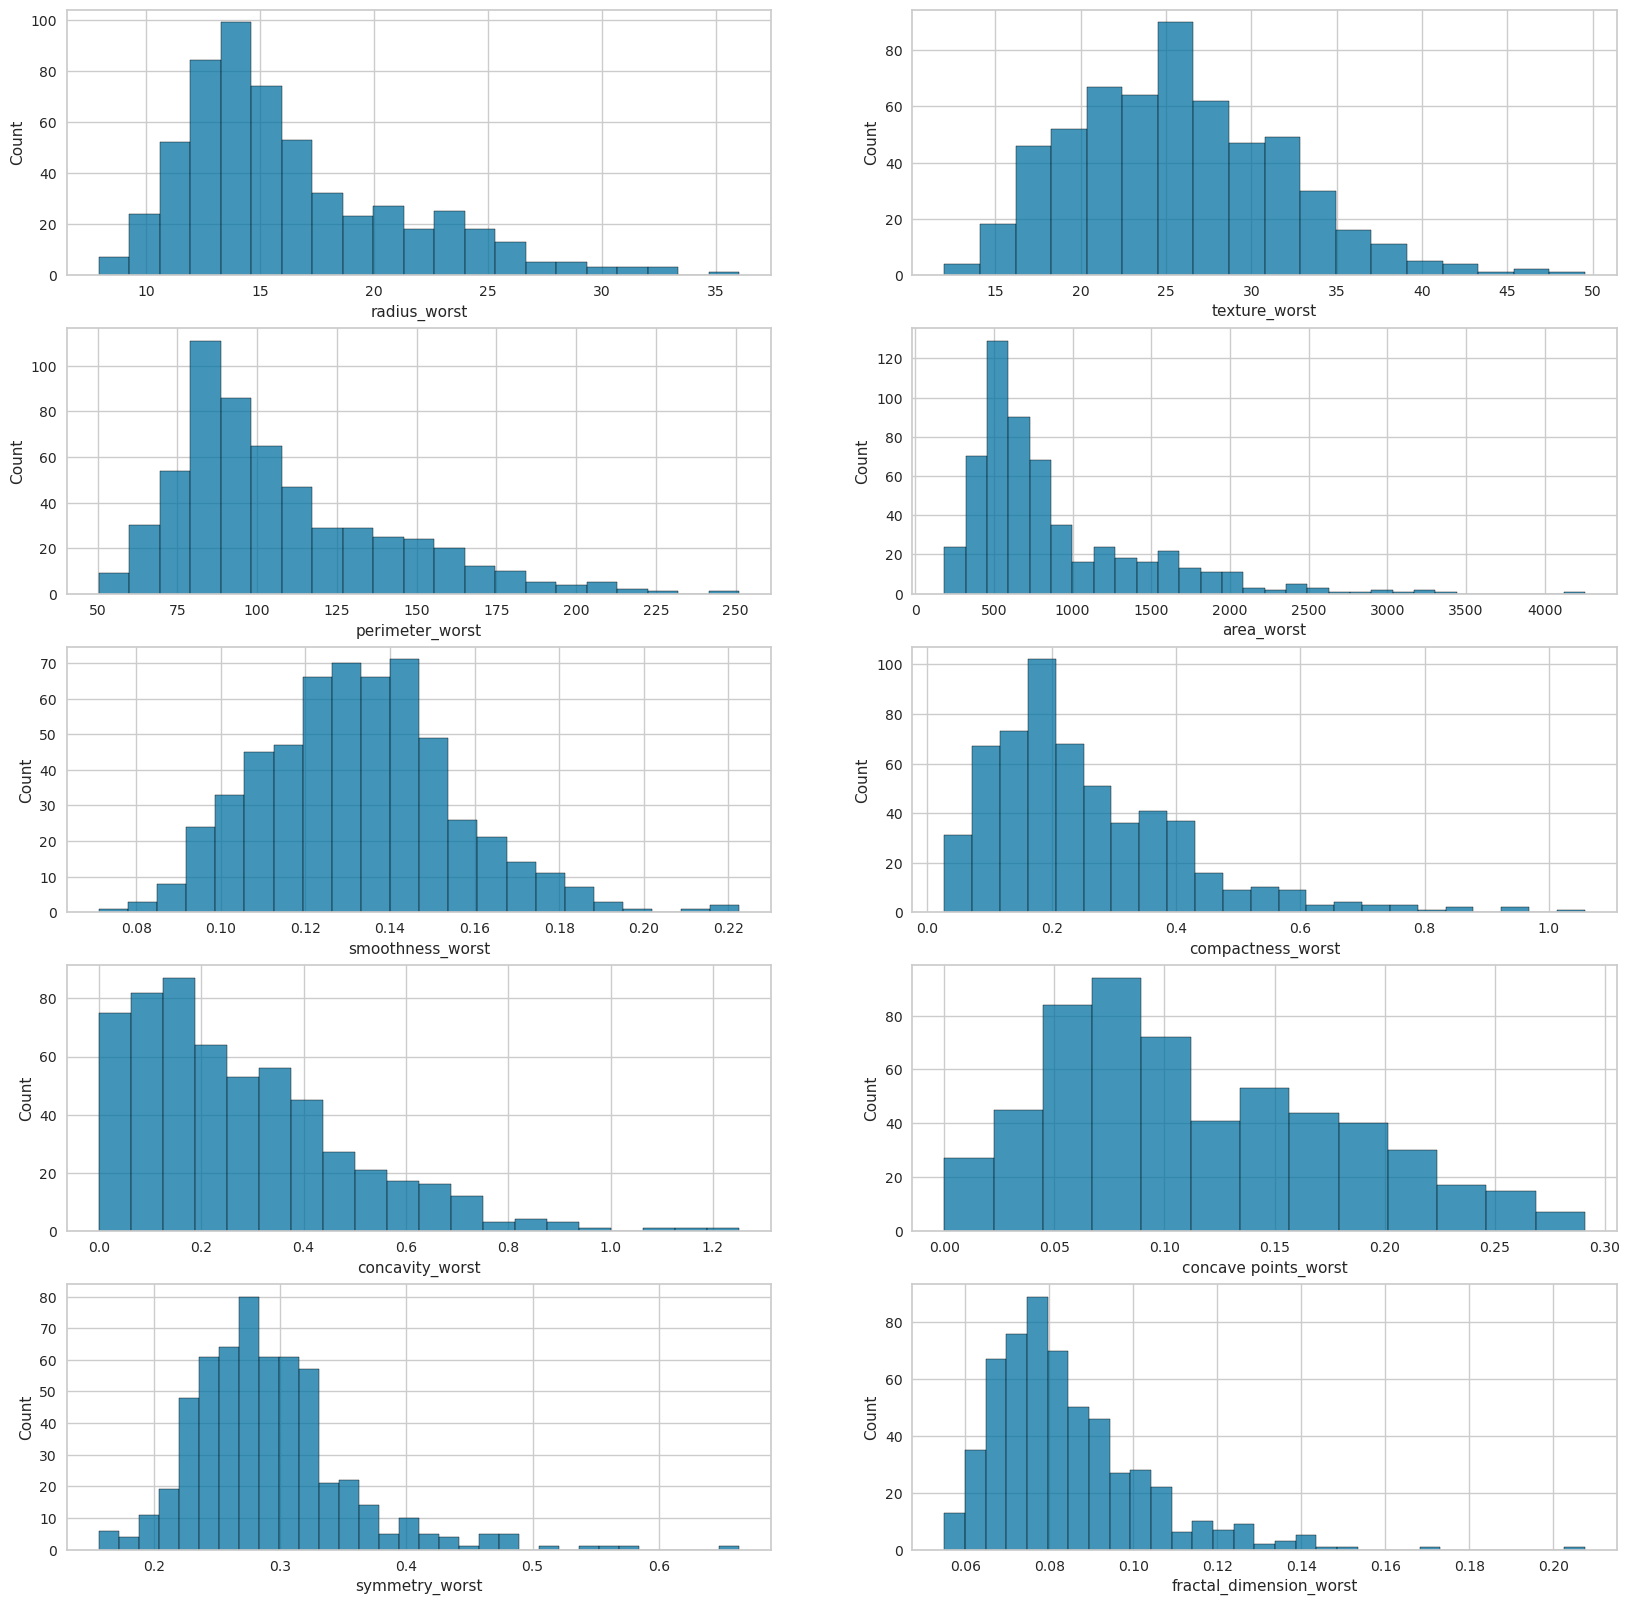

In [25]:
plt.figure(figsize = (20, 20))

plt.subplot(5, 2, 1)
sns.histplot(x = df['radius_worst'], kde = False)

plt.subplot(5, 2, 2)
sns.histplot(x = df['texture_worst'], kde = False)

plt.subplot(5, 2, 3)
sns.histplot(x = df['perimeter_worst'], kde = False)

plt.subplot(5, 2, 4)
sns.histplot(x = df['area_worst'], kde = False)

plt.subplot(5, 2, 5)
sns.histplot(x = df['smoothness_worst'], kde = False)

plt.subplot(5, 2, 6)
sns.histplot(x = df['compactness_worst'], kde = False)

plt.subplot(5, 2, 7)
sns.histplot(x = df['concavity_worst'], kde = False)

plt.subplot(5, 2, 8)
sns.histplot(x = df['concave points_worst'], kde = False)

plt.subplot(5, 2, 9)
sns.histplot(x = df['symmetry_worst'], kde = False)

plt.subplot(5, 2, 10)
sns.histplot(x = df['fractal_dimension_worst'], kde = False)

#### Bivariate Analysis

#### We can verify in the analysis of our variables with the Target variables that our data will probably be able to explain the result well, we can see that in most of the variables, the higher the values, the more chance that the Cancer result is Malignant.

<AxesSubplot:xlabel='diagnosis', ylabel='fractal_dimension_mean'>

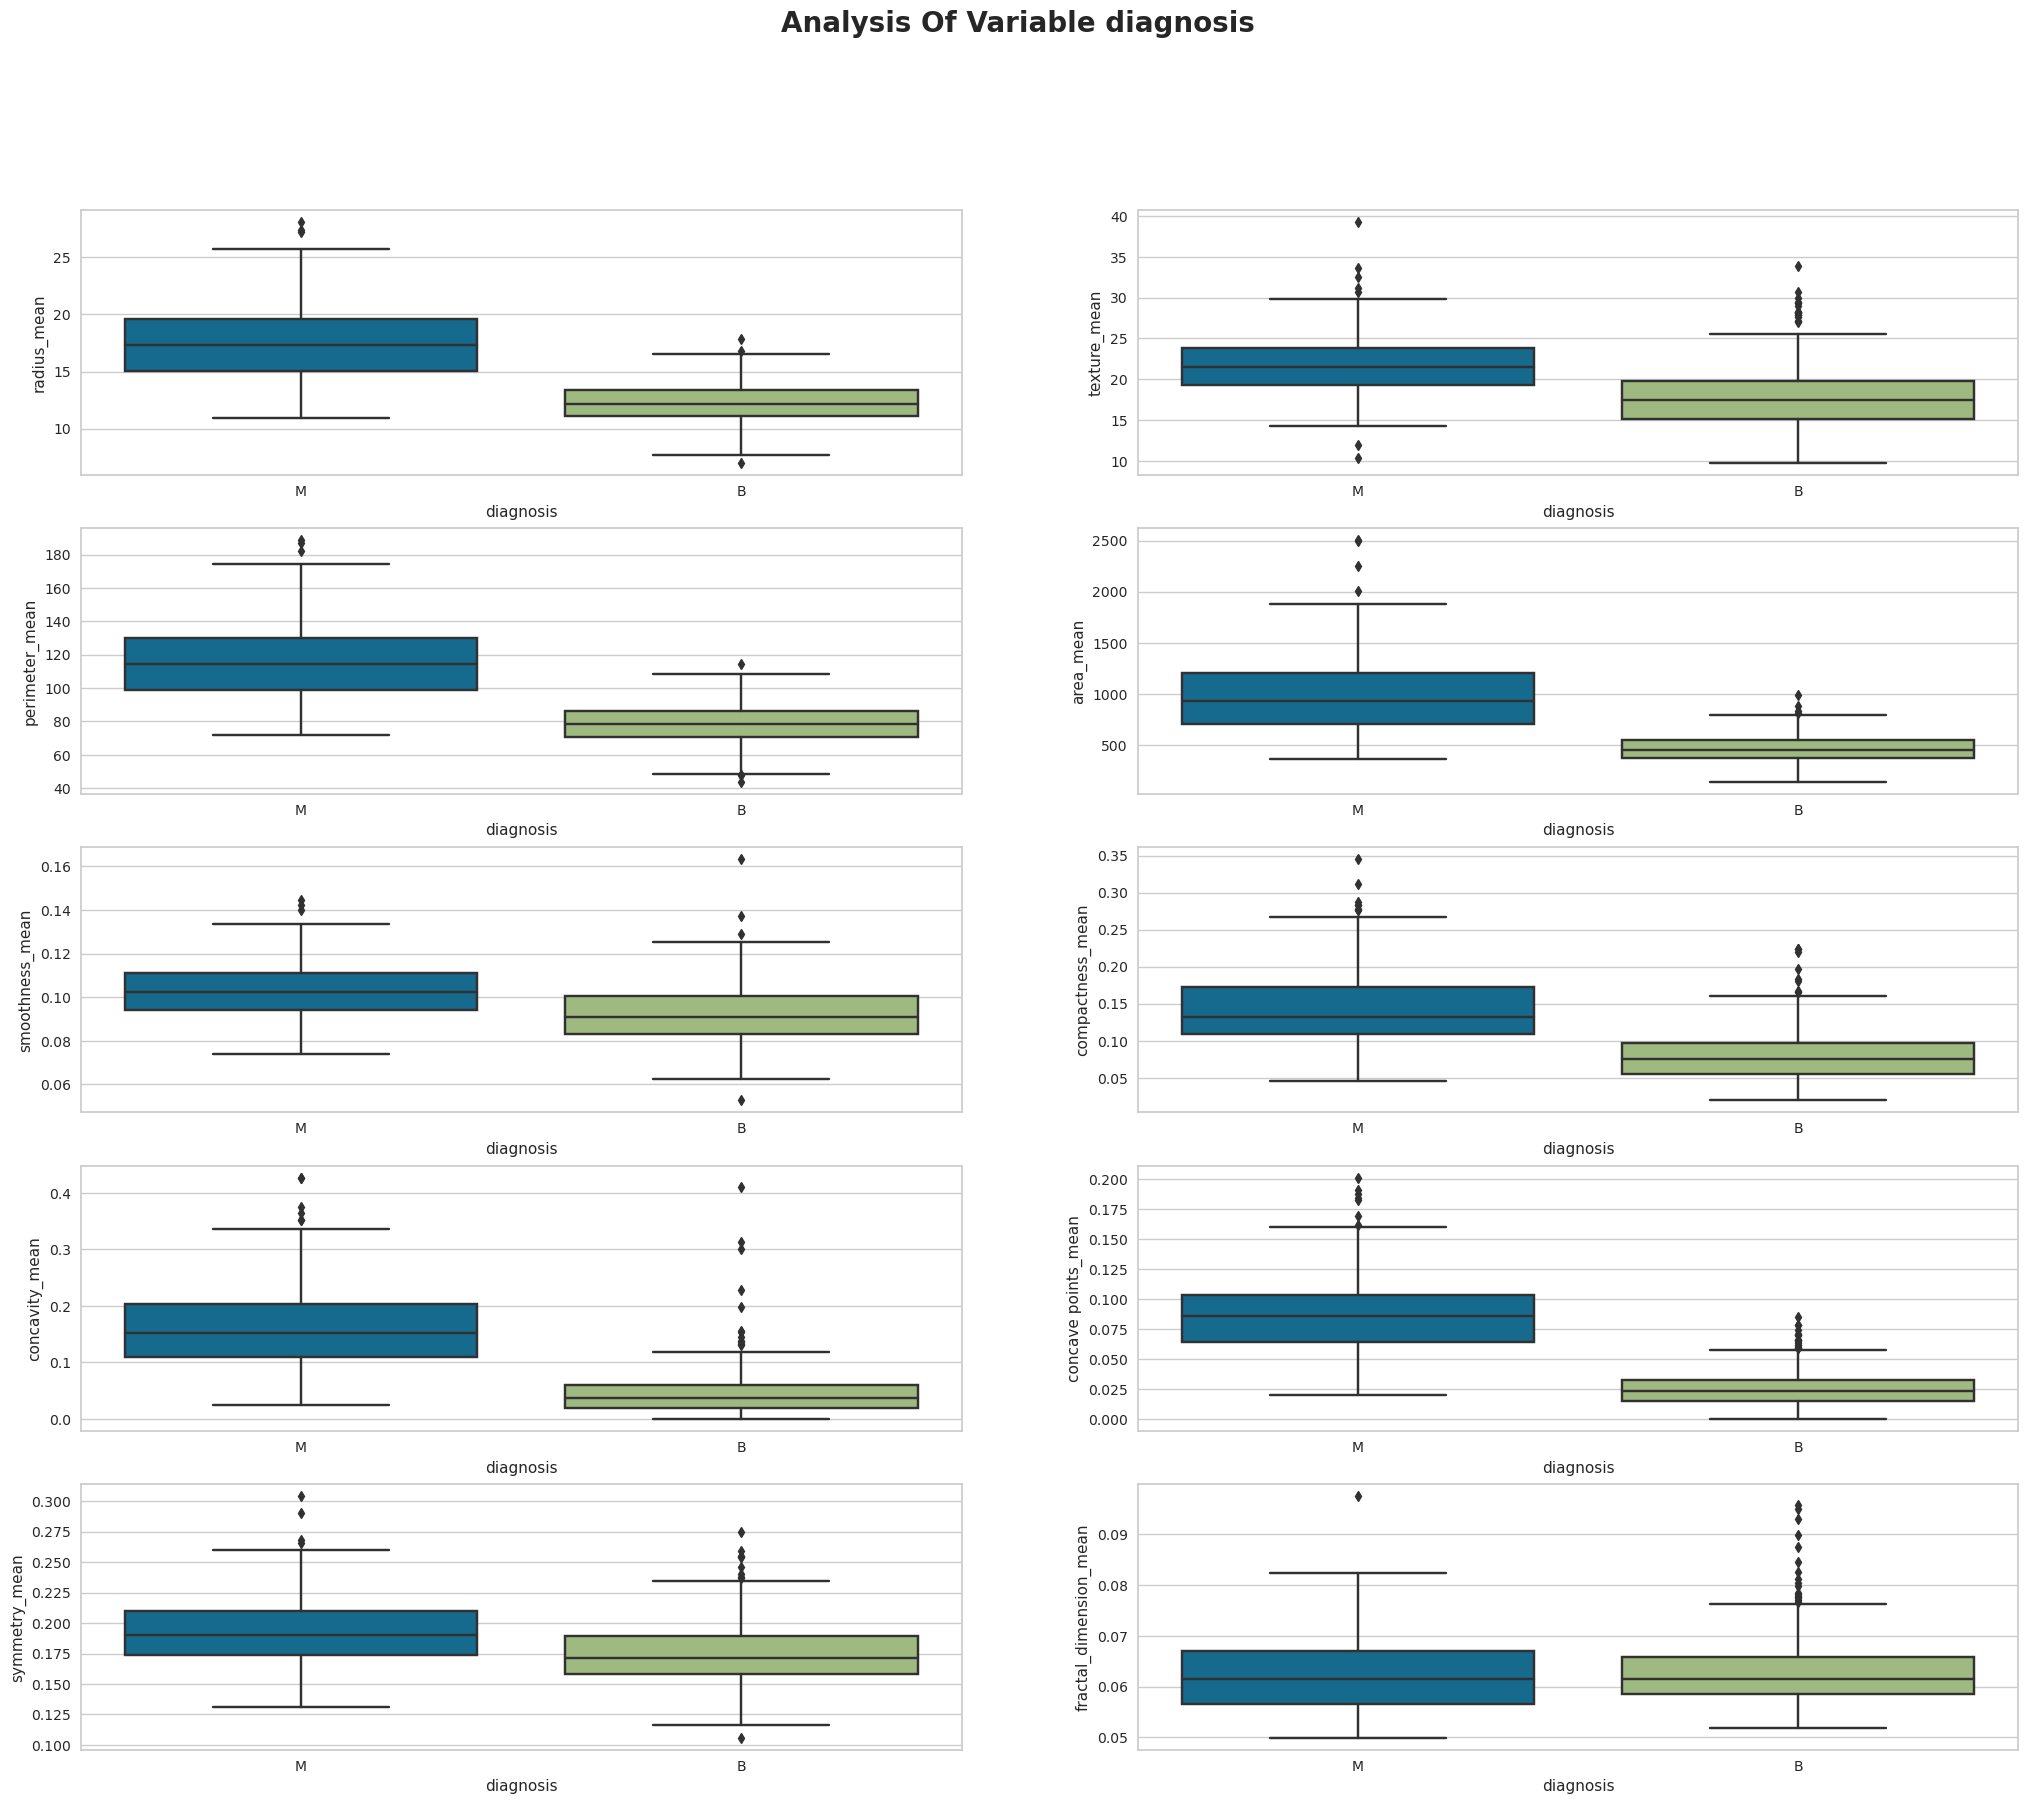

In [27]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable diagnosis",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.boxplot(x="diagnosis", y="radius_mean", data=df)

plt.subplot(5,2,2)
sns.boxplot(x="diagnosis", y="texture_mean", data=df)

plt.subplot(5,2,3)
sns.boxplot(x="diagnosis", y="perimeter_mean", data=df)

plt.subplot(5,2,4)
sns.boxplot(x="diagnosis", y="area_mean", data=df)

plt.subplot(5,2,5)
sns.boxplot(x="diagnosis", y="smoothness_mean", data=df)

plt.subplot(5,2,6)
sns.boxplot(x="diagnosis", y="compactness_mean", data=df)

plt.subplot(5,2,7)
sns.boxplot(x="diagnosis", y="concavity_mean", data=df)

plt.subplot(5,2,8)
sns.boxplot(x="diagnosis", y="concave points_mean", data=df)

plt.subplot(5,2,9)
sns.boxplot(x="diagnosis", y="symmetry_mean", data=df)

plt.subplot(5,2,10)
sns.boxplot(x="diagnosis", y="fractal_dimension_mean", data=df)

<AxesSubplot:xlabel='diagnosis', ylabel='fractal_dimension_se'>

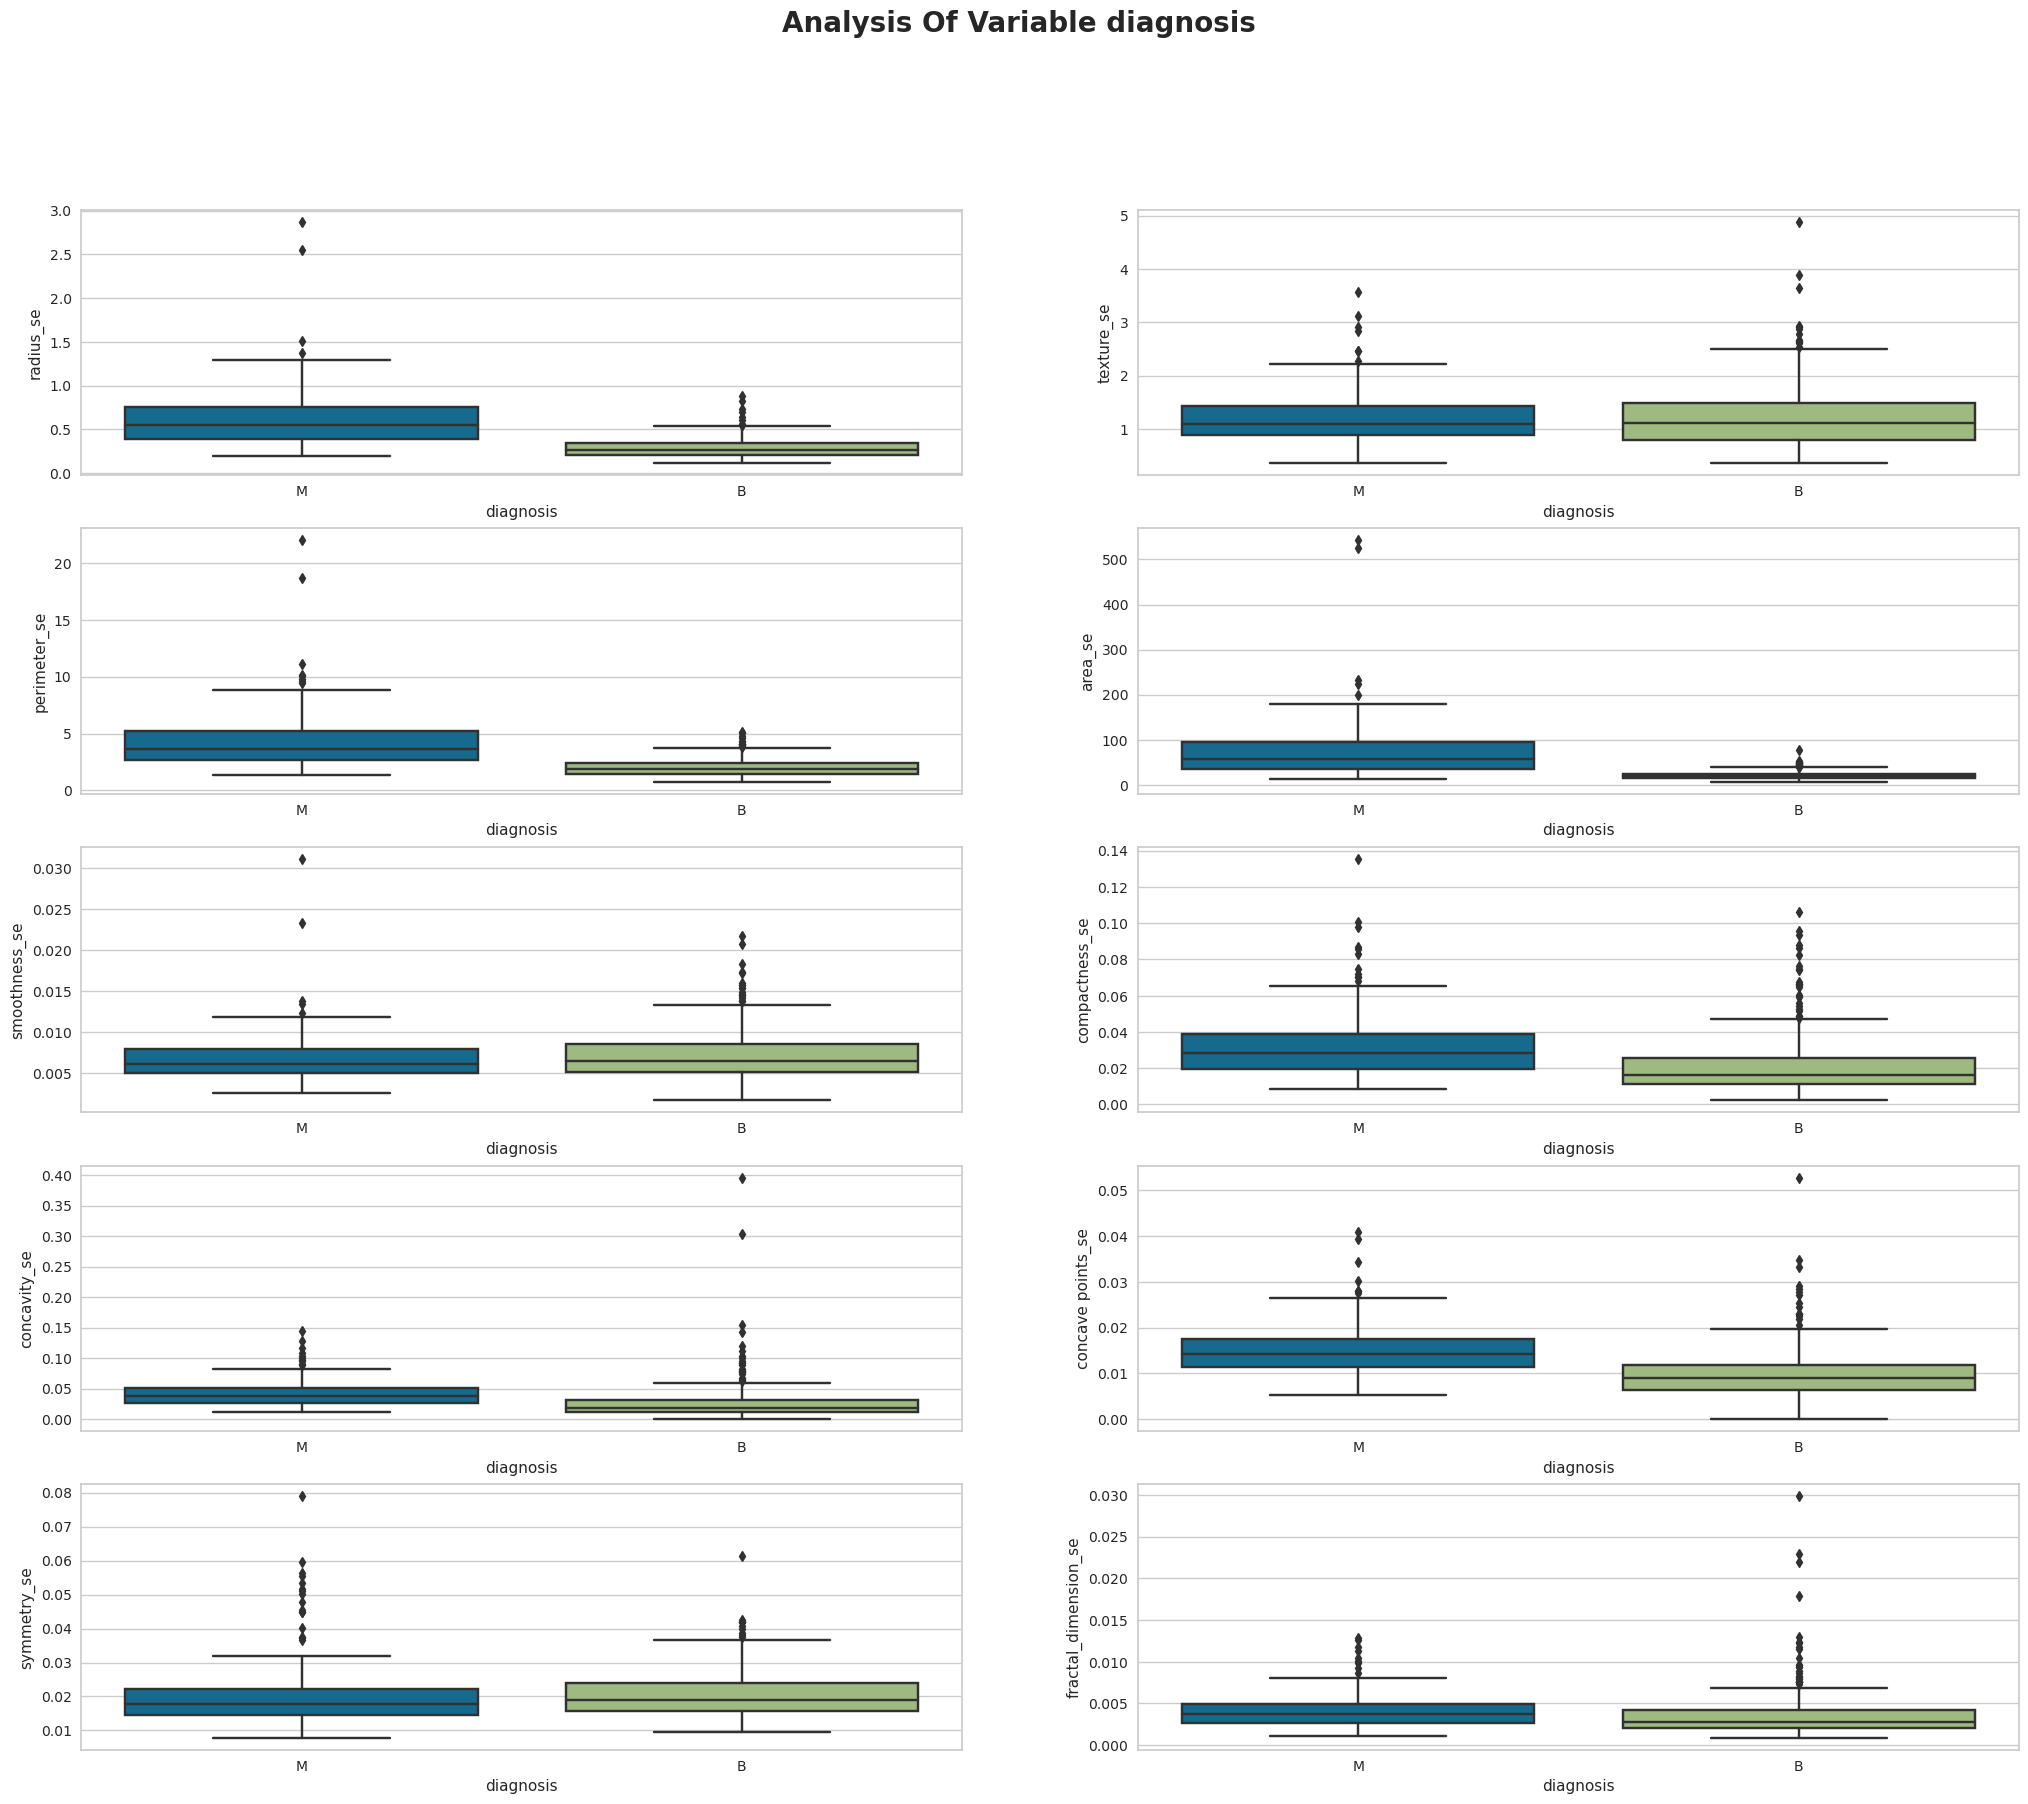

In [29]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable diagnosis",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.boxplot(x="diagnosis", y="radius_se", data=df)

plt.subplot(5,2,2)
sns.boxplot(x="diagnosis", y="texture_se", data=df)

plt.subplot(5,2,3)
sns.boxplot(x="diagnosis", y="perimeter_se", data=df)

plt.subplot(5,2,4)
sns.boxplot(x="diagnosis", y="area_se", data=df)

plt.subplot(5,2,5)
sns.boxplot(x="diagnosis", y="smoothness_se", data=df)

plt.subplot(5,2,6)
sns.boxplot(x="diagnosis", y="compactness_se", data=df)

plt.subplot(5,2,7)
sns.boxplot(x="diagnosis", y="concavity_se", data=df)

plt.subplot(5,2,8)
sns.boxplot(x="diagnosis", y="concave points_se", data=df)

plt.subplot(5,2,9)
sns.boxplot(x="diagnosis", y="symmetry_se", data=df)

plt.subplot(5,2,10)
sns.boxplot(x="diagnosis", y="fractal_dimension_se", data=df)

<AxesSubplot:xlabel='diagnosis', ylabel='fractal_dimension_worst'>

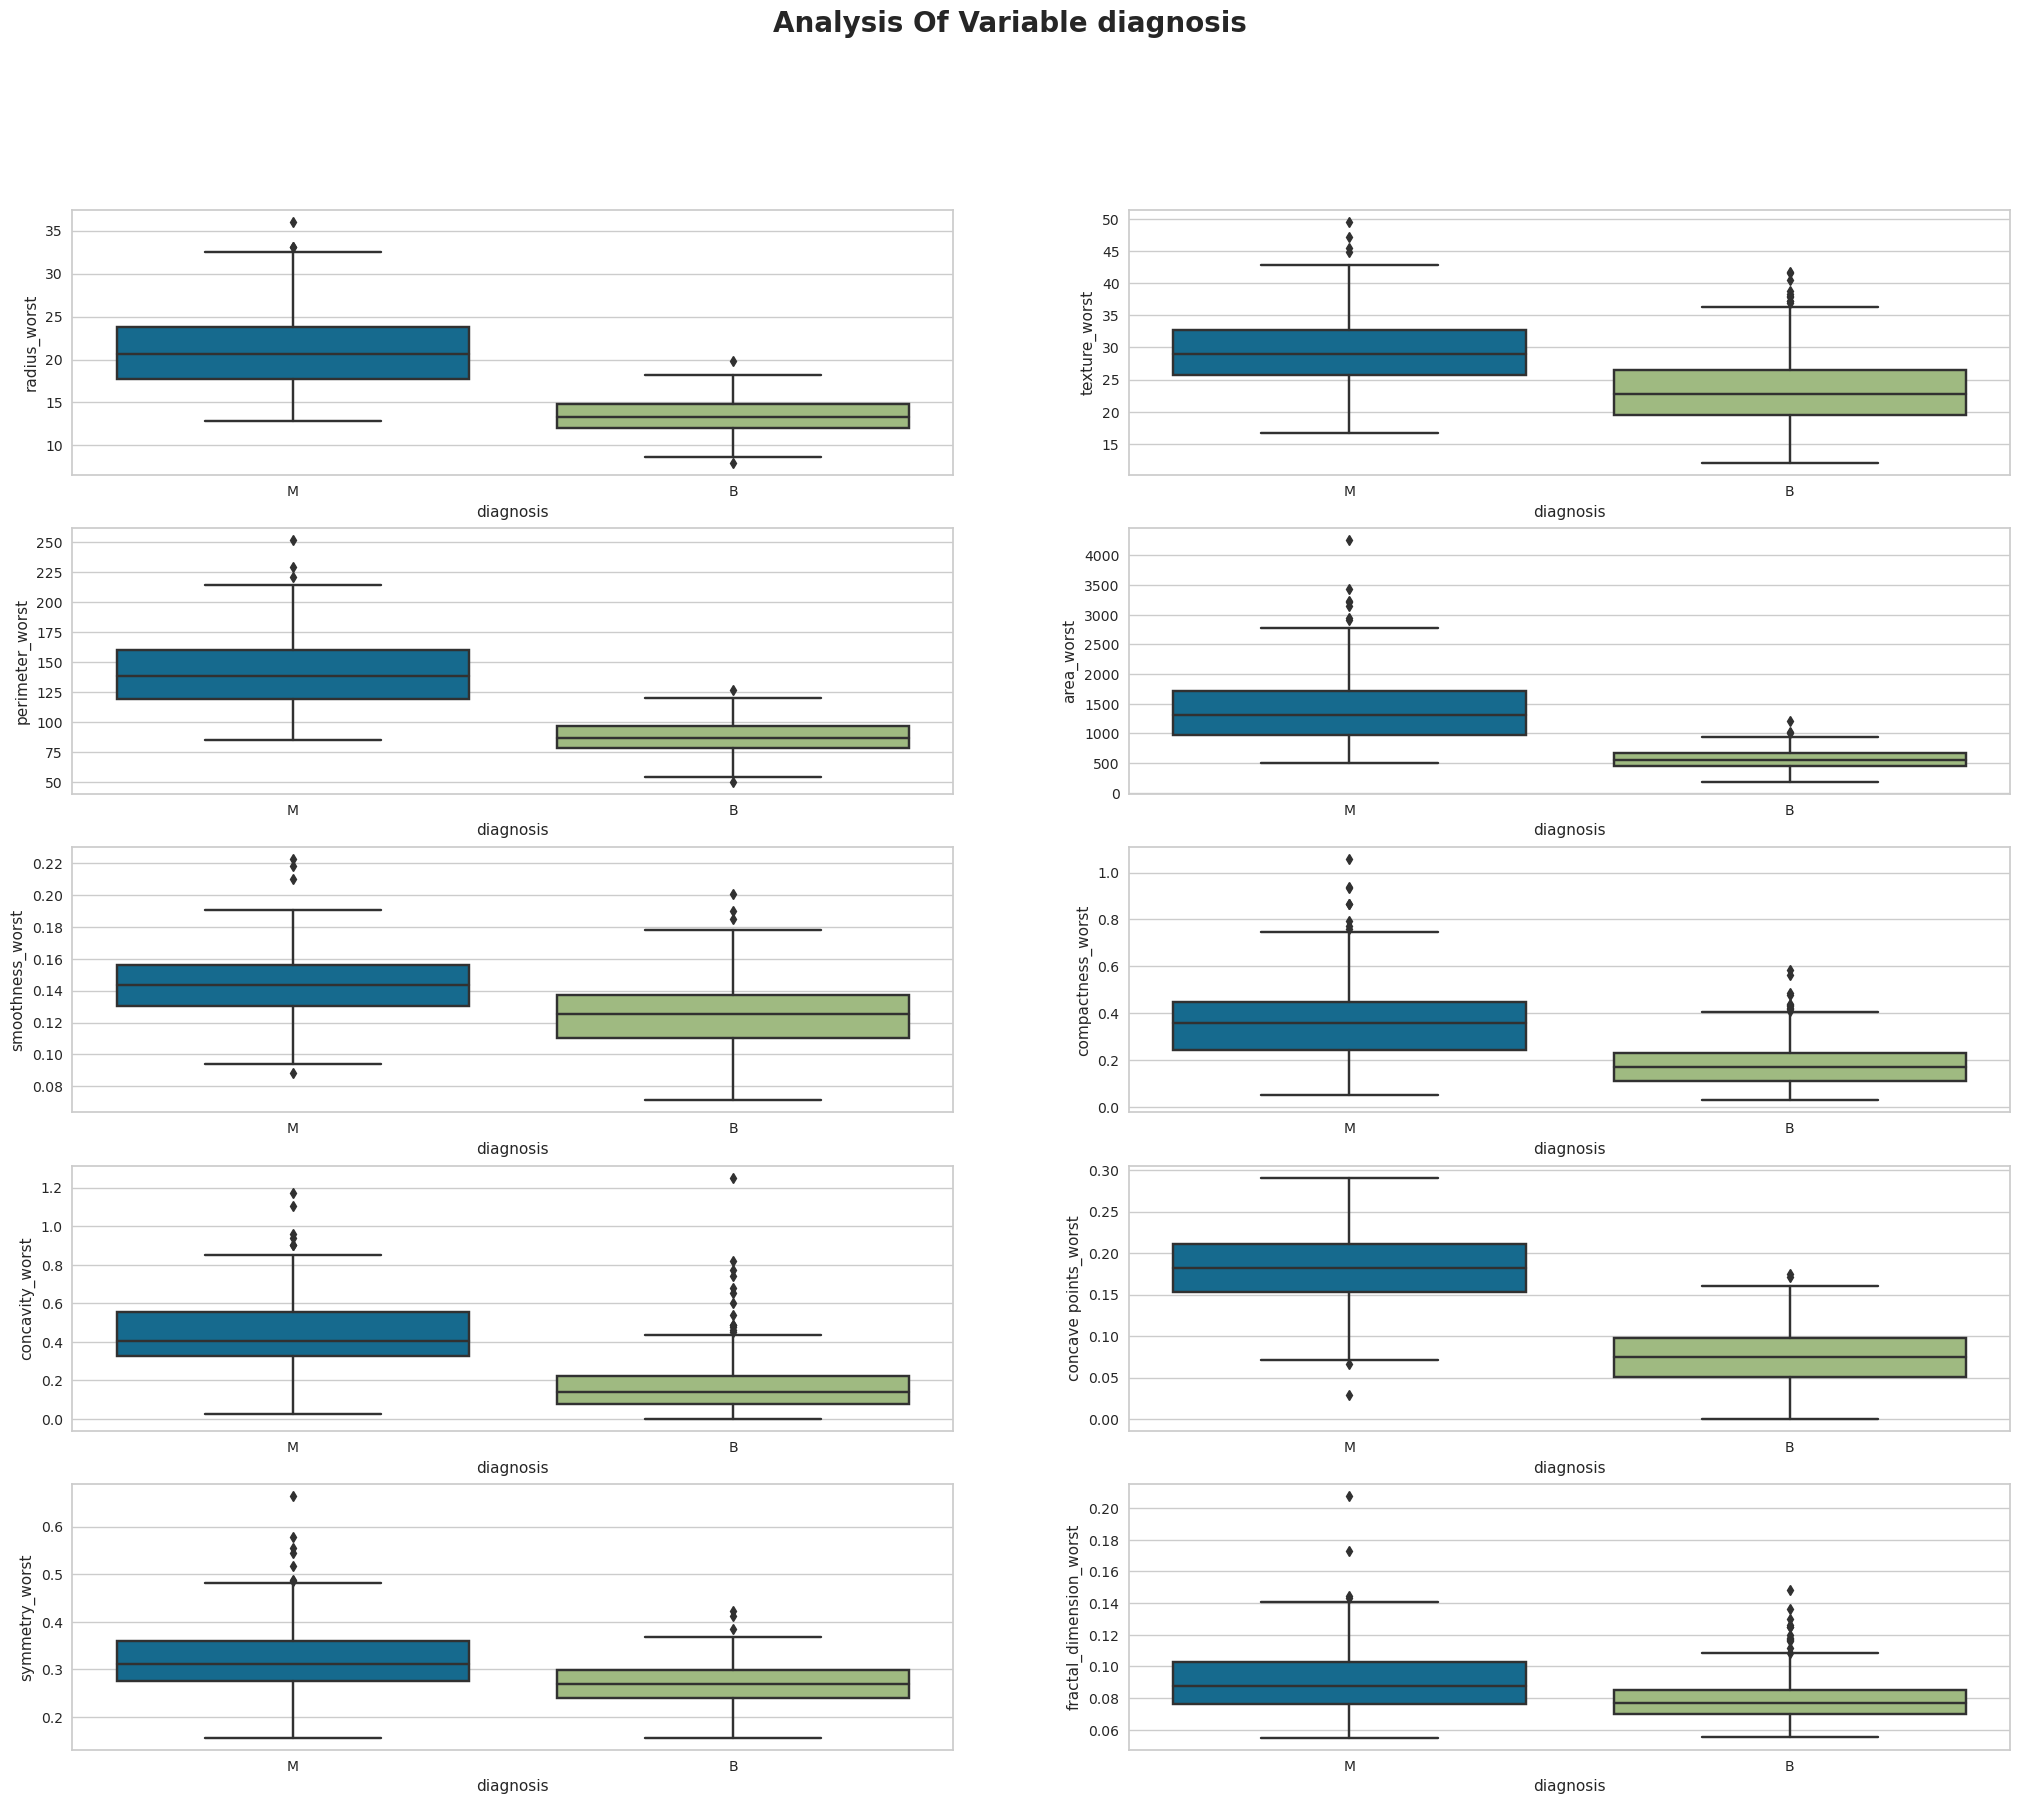

In [31]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable diagnosis",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.boxplot(x="diagnosis", y="radius_worst", data=df)

plt.subplot(5,2,2)
sns.boxplot(x="diagnosis", y="texture_worst", data=df)

plt.subplot(5,2,3)
sns.boxplot(x="diagnosis", y="perimeter_worst", data=df)

plt.subplot(5,2,4)
sns.boxplot(x="diagnosis", y="area_worst", data=df)

plt.subplot(5,2,5)
sns.boxplot(x="diagnosis", y="smoothness_worst", data=df)

plt.subplot(5,2,6)
sns.boxplot(x="diagnosis", y="compactness_worst", data=df)

plt.subplot(5,2,7)
sns.boxplot(x="diagnosis", y="concavity_worst", data=df)

plt.subplot(5,2,8)
sns.boxplot(x="diagnosis", y="concave points_worst", data=df)

plt.subplot(5,2,9)
sns.boxplot(x="diagnosis", y="symmetry_worst", data=df)

plt.subplot(5,2,10)
sns.boxplot(x="diagnosis", y="fractal_dimension_worst", data=df)

## <font color='blue'> 3. Model Building. </font>

#### Label Encoder
- Here we are going to use Label Encoder to transform our categorical variables into continuous.

In [33]:
from sklearn.preprocessing import LabelEncoder

label_encoder_diagnosis = LabelEncoder()

df['diagnosis'] = label_encoder_diagnosis.fit_transform(df['diagnosis'])

#### Separating into features variables and target variable.

In [36]:
X = df.drop('diagnosis', axis = 1)
X = X.values
y = df['diagnosis']

#### StandardScaler
- Here we will use StandardScaler to put our data in the same scale.

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

#### Transforming Data into Train e Test, here we will use 30% of our data to test the machine learning models.

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.3, random_state = 0)

#### Naive Bayes
#### Running Gaussian Model.
- Here we will use the Naive Bayes Model, we will test Gaussian model, using our Normal Data.

#### Here, in our first model, we already obtained a great result, we achieved an accuracy of 91.22%, the model was a little better at predicting Benign values, but it was very good at predicting Malignant ones as well.

0.9122807017543859

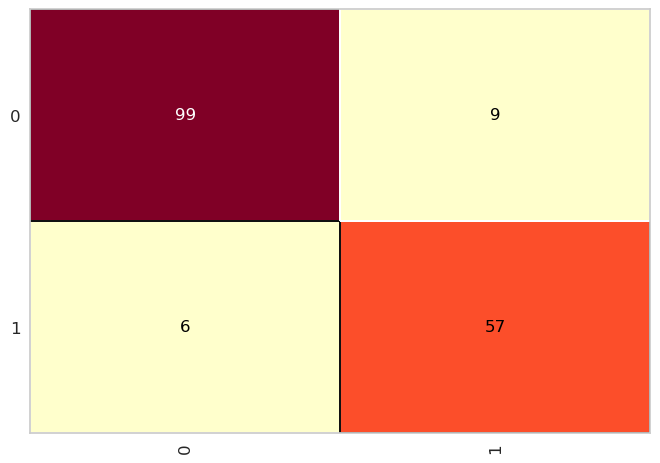

In [39]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
previsoes = naive_bayes.predict(X_test)

cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [40]:
classification_naive_gaussian = (classification_report(y_test, previsoes))
print(classification_naive_gaussian)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       108
           1       0.86      0.90      0.88        63

    accuracy                           0.91       171
   macro avg       0.90      0.91      0.91       171
weighted avg       0.91      0.91      0.91       171



In [105]:
score_naive_gaussian = 0.9122807017543859

#### Decision Tree
- Here we will use the Decision Tree Model, we will test Entropy and Gini calculations.
- Here we are applying GridSearch to check which are the best metrics to use.

In [41]:
parameters = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

model = DecisionTreeClassifier()
gridDecisionTree = RandomizedSearchCV(model, parameters, cv = 3, n_jobs = -1)
gridDecisionTree.fit(X_train, y_train)

print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Mín Split:  3
Max Nvl:  6
Algorithm:  entropy
Score:  0.9321789321789322


#### Running Decision Tree.

#### Another great result, we had a result similar to the Naive Bayes model.

0.9181286549707602

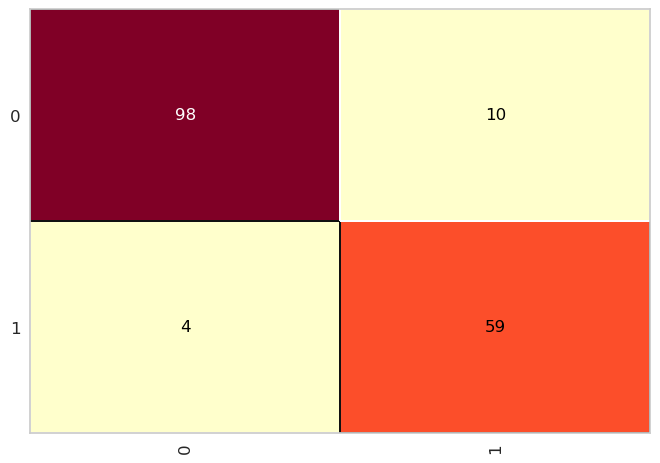

In [42]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 3, max_depth= 6, random_state=0)
decision_tree.fit(X_train, y_train)
previsoes = decision_tree.predict(X_test)

cm = ConfusionMatrix(decision_tree)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [43]:
classification_decision = (classification_report(y_test, previsoes))
print(classification_decision)

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       108
           1       0.86      0.94      0.89        63

    accuracy                           0.92       171
   macro avg       0.91      0.92      0.91       171
weighted avg       0.92      0.92      0.92       171



In [106]:
score_tree = 0.9181286549707602

#### Checking the most important variables of the model.

In [46]:
columns = df.drop('diagnosis', axis = 1).columns
feature_imp = pd.Series(decision_tree.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp

concave points_worst       0.625169
perimeter_worst            0.162199
texture_worst              0.074306
texture_mean               0.028716
smoothness_worst           0.024391
symmetry_mean              0.023882
symmetry_se                0.022885
radius_se                  0.022331
fractal_dimension_mean     0.016119
area_worst                 0.000000
concave points_se          0.000000
compactness_worst          0.000000
concavity_worst            0.000000
radius_worst               0.000000
fractal_dimension_se       0.000000
symmetry_worst             0.000000
radius_mean                0.000000
compactness_se             0.000000
concavity_se               0.000000
smoothness_se              0.000000
area_se                    0.000000
perimeter_se               0.000000
texture_se                 0.000000
concave points_mean        0.000000
concavity_mean             0.000000
compactness_mean           0.000000
smoothness_mean            0.000000
area_mean                  0

#### RandomForest
- Here we will use the Random Forest Model, we will test Entropy and Gini calculations.
- Applying GridSearch

In [47]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

model = RandomForestClassifier()
gridRandomForest = RandomizedSearchCV(model, parameters, cv = 5, n_jobs = -1)
gridRandomForest.fit(X_train, y_train)

print('Algorithm: ', gridRandomForest.best_estimator_.criterion)
print('Score: ', gridRandomForest.best_score_)
print('Mín Split: ', gridRandomForest.best_estimator_.min_samples_split)
print('Max Nvl: ', gridRandomForest.best_estimator_.max_depth)

Algorithm:  entropy
Score:  0.9573417721518988
Mín Split:  3
Max Nvl:  9


#### Running Random Forest.

#### A practically perfect model, it managed to improve even the previous models that were already good models.

0.9707602339181286

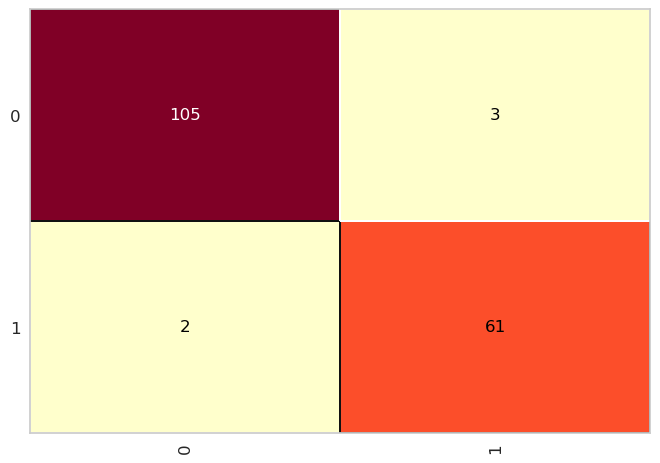

In [48]:
random_forest = RandomForestClassifier(n_estimators = 100, min_samples_split = 3, max_depth= 9,  criterion = 'entropy', random_state = 0)
random_forest.fit(X_train, y_train)
previsoes = random_forest.predict(X_test)

cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [49]:
classification_random = (classification_report(y_test, previsoes))
print(classification_random)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [107]:
score_random = 0.9707602339181286

#### Checking the most important variables of the model.

In [51]:
feature_imp_random = pd.Series(random_forest.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp_random

perimeter_worst            0.147768
concave points_worst       0.135823
concave points_mean        0.106958
radius_worst               0.097605
concavity_mean             0.087164
perimeter_mean             0.049440
area_worst                 0.049063
concavity_worst            0.032892
area_mean                  0.032639
area_se                    0.031475
radius_mean                0.026373
radius_se                  0.025182
texture_worst              0.023154
texture_mean               0.020247
perimeter_se               0.017244
compactness_worst          0.015280
smoothness_worst           0.014738
symmetry_worst             0.010038
smoothness_mean            0.009666
fractal_dimension_worst    0.008754
compactness_mean           0.007984
symmetry_se                0.007699
compactness_se             0.007127
symmetry_mean              0.006643
texture_se                 0.006009
concavity_se               0.005800
fractal_dimension_mean     0.004901
smoothness_se              0

#### Extra Trees
- Here we will use the Extra Trees Model, we will test Entropy and Gini calculations.
- Applying GridSearch

In [52]:
from sklearn.ensemble import ExtraTreesClassifier

parameters = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

model = ExtraTreesClassifier()
gridExtraTrees = RandomizedSearchCV(model, parameters, cv = 3, n_jobs = -1)
gridExtraTrees.fit(X_train, y_train)

print('Algorithm: ', gridExtraTrees.best_estimator_.criterion)
print('Score: ', gridExtraTrees.best_score_)
print('Mín Split: ', gridExtraTrees.best_estimator_.min_samples_split)
print('Max Nvl: ', gridExtraTrees.best_estimator_.max_depth)

Algorithm:  gini
Score:  0.9648553201184781
Mín Split:  3
Max Nvl:  11


#### Running Extra Trees

#### A great model but worse than Random Forest, here the model was nearly perfect for predicting Benign values but underperforming with Malignant ones.

0.9473684210526315

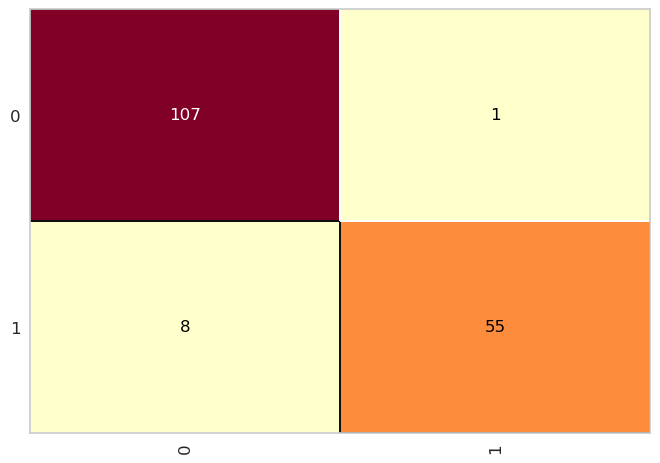

In [53]:
extra_trees = ExtraTreesClassifier(n_estimators = 100, min_samples_split = 6, max_depth= 3, criterion = 'gini', random_state = 0)
extra_trees.fit(X_train, y_train)
previsoes = extra_trees.predict(X_test)

cm = ConfusionMatrix(extra_trees)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [54]:
classification_extra = (classification_report(y_test, previsoes))
print(classification_extra)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       108
           1       0.98      0.87      0.92        63

    accuracy                           0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171



In [108]:
score_extra = 0.9473684210526315

#### K-Means
- Here we will use the K Means Model.

#### Here at K-Means we had 92%, it's also a good model.

In [56]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2, random_state= 0)
model.fit(X_train)
previsoes = model.predict(X_test)
classification_kmeans_standard = (accuracy_score(y_test, previsoes))
print(classification_kmeans_standard)

0.9298245614035088


In [109]:
score_kmeans = 0.9298245614035088

#### K-Neighbors
- Here we will use the K-Neighbors Model, we will use the GridSearch Model to figure out the best metrics to use in this model.
- Here we will use the GridSearch to figure out the best metrics to use in this model.

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

k_list = list(range(1,10))
k_values = dict(n_neighbors = k_list)
grid = GridSearchCV(knn, k_values, cv = 2, scoring = 'accuracy', n_jobs = -1)
grid.fit(X_train, y_train)


grid.best_params_, grid.best_score_

({'n_neighbors': 4}, 0.9547738693467337)

#### Running the Model

#### Another great model, managed to get ALL the benign values right.

0.9532163742690059

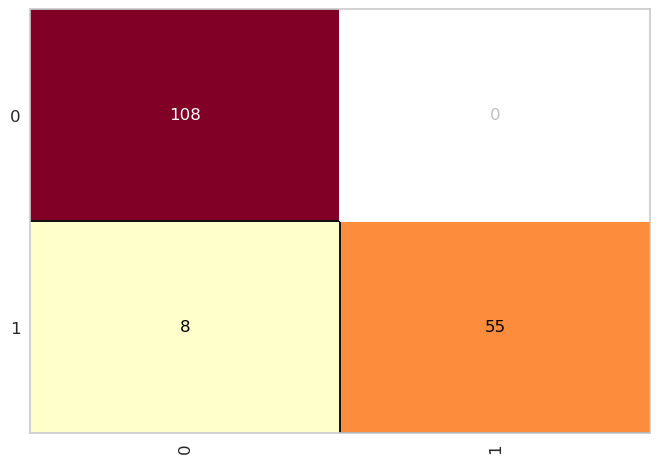

In [59]:
knn = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
previsoes = knn.predict(X_test)

cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [60]:
classification_knn = (classification_report(y_test, previsoes))
print(classification_knn)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       108
           1       1.00      0.87      0.93        63

    accuracy                           0.95       171
   macro avg       0.97      0.94      0.95       171
weighted avg       0.96      0.95      0.95       171



In [110]:
score_knn = 0.9532163742690059

#### Logistic Regression
#### The Model managed to predict both outcomes very well.

0.9766081871345029

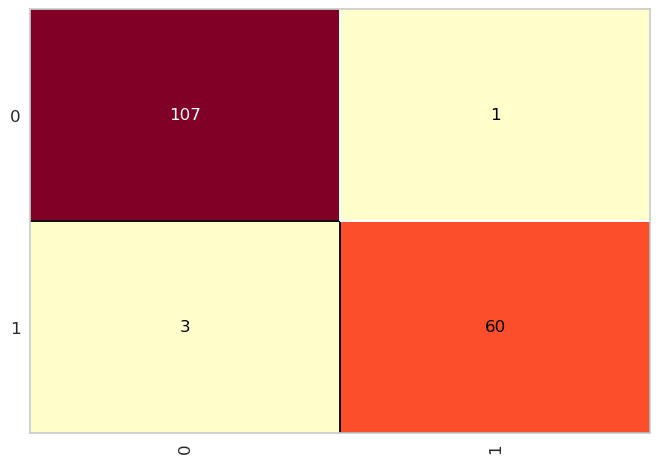

In [62]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = 1, max_iter=1000)
logistic.fit(X_train, y_train)
previsoes = logistic.predict(X_test)

cm = ConfusionMatrix(logistic)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [63]:
logistic_normal = (classification_report(y_test, previsoes))
print(logistic_normal)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [111]:
logistic_normal = 0.9766081871345029

#### AdaBoost
- Here we will use the AdaBoost Model, we will use the GridSearch Model to figure out the best metrics to use in this model.
- Applying GridSearch

In [65]:
from sklearn.ensemble import AdaBoostClassifier

parameters = {'learning_rate': [0.01, 0.02, 0.05, 0.07, 0.09, 0.1, 0.3, 0.5, 0.005],
              'n_estimators': [300, 500]
             }

model = AdaBoostClassifier()
gridAdaBoost = RandomizedSearchCV(model, parameters, cv = 2, n_jobs = -1)
gridAdaBoost.fit(X_train, y_train)

print('Learning Rate: ', gridAdaBoost.best_estimator_.learning_rate)
print('Score: ', gridAdaBoost.best_score_)

Learning Rate:  0.07
Score:  0.9522613065326633


#### Running the Model.

#### The Model managed to predict both outcomes very well.

0.9766081871345029

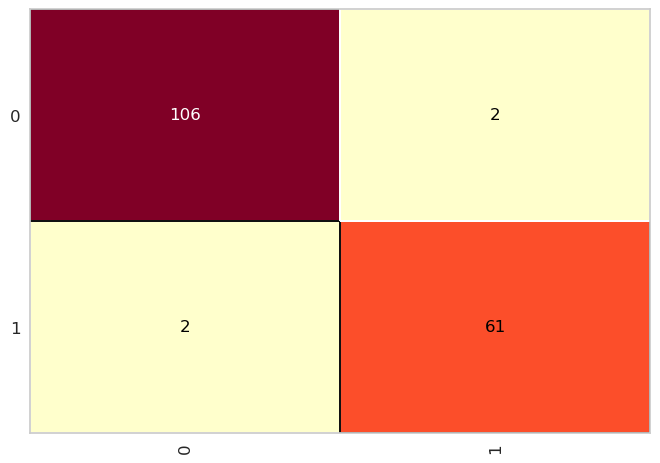

In [66]:
ada_boost = AdaBoostClassifier(n_estimators = 500, learning_rate = 0.07, random_state = 0)
ada_boost.fit(X_train, y_train)
previsoes = ada_boost.predict(X_test)

cm = ConfusionMatrix(ada_boost)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [67]:
classification_ada_scaler = (classification_report(y_test, previsoes))
print(classification_ada_scaler)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [112]:
score_ada_scaler = 0.9766081871345029

#### Gradient Boosting
- Here we will use the Gradient Boosting Model, here we will use the GridSearch Model to figure out the best metrics to use in this model.

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

parameters = {'learning_rate': [0.01, 0.02, 0.05, 0.07, 0.09, 0.1, 0.3, 0.5, 0.005],
              'n_estimators': [300, 500]
             }


model = GradientBoostingClassifier()
gridGradient = RandomizedSearchCV(model, parameters, cv = 5, n_jobs = -1)
gridGradient.fit(X_train, y_train)

print('Learning Rate: ', gridGradient.best_estimator_.learning_rate)
print('Score: ', gridGradient.best_score_)

Learning Rate:  0.5
Score:  0.9572468354430379


#### Running Model

#### The Model managed to predict both outcomes very well.

0.9649122807017544

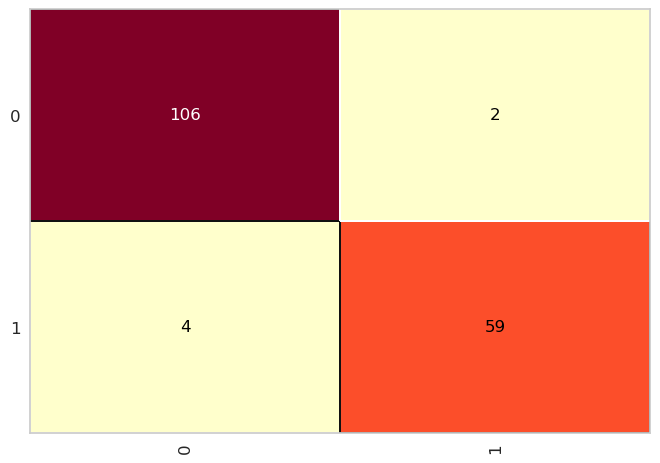

In [70]:
grad_boost = GradientBoostingClassifier(n_estimators = 300, learning_rate = 0.5, random_state = 0)
grad_boost.fit(X_train, y_train)
previsoes = grad_boost.predict(X_test)

cm = ConfusionMatrix(grad_boost)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [71]:
classification_grad_standard = (classification_report(y_test, previsoes))
print(classification_grad_standard)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [113]:
score_grad_standard = 0.9649122807017544

#### LGBM
- Here we will use the LGBM Model, here we will use the GridSearch Model to figure out the best metrics to use in this model.

In [73]:
from lightgbm import LGBMClassifier

parameters = {'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 0.8],
              'max_depth': [1 , 2, 3, 4, 5, 6, 7, 8, 9],
              'min_child_weight': [1, 3, 5, 7, 9],
              'min_child_samples': [1, 3, 5, 7, 9, 15],
              'num_leaves': [3, 5, 7, 9],
              'subsample': [0.1, 0.3, 0.5, 0.7, 0.9],
              'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9],
              'n_estimators': [500],
              'reg_alpha': [0.1, 0.3, 0.5, 0.7, 0.9],
              'reg_lambda': [0.1, 0.3, 0.5, 0.7, 0.9]
             }
    
model = LGBMClassifier()
lgbm_grid = RandomizedSearchCV(model,parameters, cv = 3, n_jobs = -1)
lgbm_grid.fit(X_train, y_train.ravel())

print('Score: ', lgbm_grid.best_score_)
print('Params: ', lgbm_grid.best_params_)

Score:  0.9623110807321332
Params:  {'subsample': 0.9, 'reg_lambda': 0.9, 'reg_alpha': 0.7, 'num_leaves': 3, 'n_estimators': 500, 'min_child_weight': 3, 'min_child_samples': 15, 'max_depth': 7, 'learning_rate': 0.03, 'colsample_bytree': 0.1}


#### Running the Model.

#### The Model managed to predict both outcomes very well.

0.9766081871345029

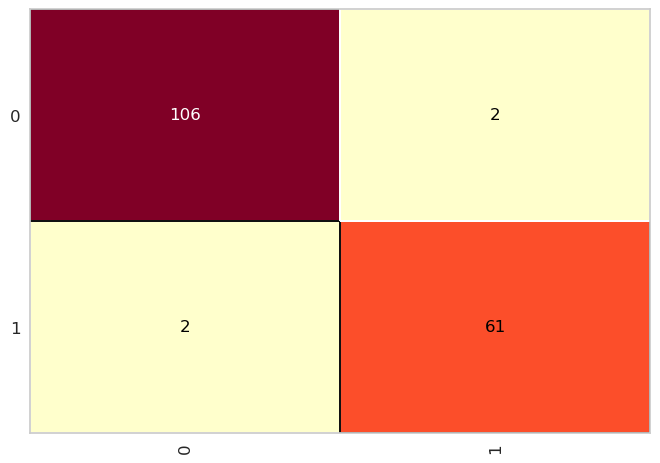

In [74]:
lgbm = LGBMClassifier(subsample = 0.9, reg_lambda = 0.9, reg_alpha = 0.7, num_leaves = 3, n_estimators = 500, min_child_weight = 3, min_child_samples = 15, max_depth = 7, learning_rate = 0.03, colsample_bytree = 0.1, random_state = 0)
lgbm.fit(X_train, y_train)
previsoes = lgbm.predict(X_test)

cm = ConfusionMatrix(lgbm)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [75]:
classification_lgbm_standard = (classification_report(y_test, previsoes))
print(classification_lgbm_standard)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [114]:
score_lgbm_standard = 0.9766081871345029

#### XGB Boost
- Here we will use the XGB Boost Model, here we will use the GridSearch Model to figure out the best metrics to use in this model.

In [77]:
from xgboost.sklearn import XGBClassifier

parameters = {'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 0.8],
              'max_depth': [1 , 2, 3, 4, 5, 6, 7, 8, 9],
              'min_child_weight': [1, 3, 5, 7, 9],
              'subsample': [0.1, 0.3, 0.5, 0.7, 0.9],
              'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9],
              'n_estimators': [500],
              'gamma': [0.1, 0.3, 0.5, 0.7, 0.9],
              'reg_alpha': [0.1, 0.3, 0.5, 0.7, 0.9],
              'reg_lambda': [0.1, 0.3, 0.5, 0.7, 0.9]
             }

model = XGBClassifier()
xgb_grid = RandomizedSearchCV(model,parameters, cv = 2, n_jobs = -1)
xgb_grid.fit(X_train, y_train)

print('Score: ', xgb_grid.best_score_)
print('Params: ', xgb_grid.best_params_)

Score:  0.9522613065326633
Params:  {'subsample': 0.7, 'reg_lambda': 0.7, 'reg_alpha': 0.1, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 0.3}


#### Running the Model.

#### The best model we have.

0.9824561403508771

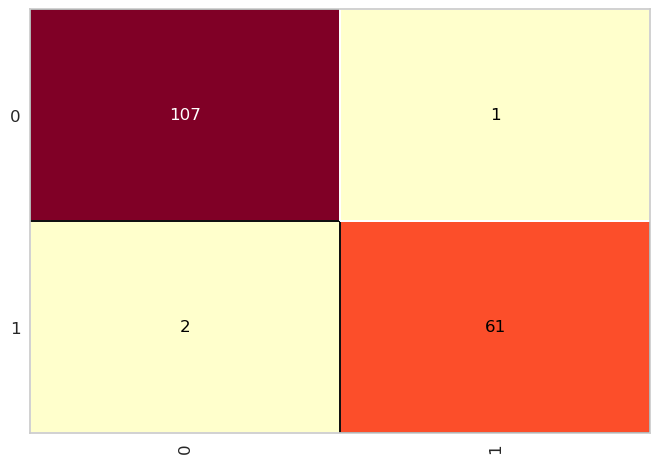

In [78]:
xgb = XGBClassifier(subsample = 0.7, reg_lambda = 0.7, reg_alpha = 0.1, n_estimators = 500, min_child_weight = 3, max_depth = 4, learning_rate = 0.05, gamma = 0.3, colsample_bytree = 0.3, random_state = 0)
xgb.fit(X_train, y_train)
previsoes = xgb.predict(X_test)

cm = ConfusionMatrix(xgb)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [79]:
classification_xgb_standard = (classification_report(y_test, previsoes))
print(classification_xgb_standard)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       108
           1       0.98      0.97      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [115]:
score_xgb = 0.9824561403508771

#### Checking key variables to predict the outcome.
- Chi 2

In [100]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

features = X
target = y

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(columns),columns = ['Chi Squared Score']) 

featureScores.sort_values(by = 'Chi Squared Score', ascending = False).round(2)

,Chi Squared Score
area_worst,112598.43
area_mean,53991.66
area_se,8758.50
perimeter_worst,3665.04
perimeter_mean,2011.10
radius_worst,491.69
radius_mean,266.10
perimeter_se,250.57
texture_worst,174.45
texture_mean,93.90


- Decision Tree

In [102]:
feature_imp

concave points_worst       0.625169
perimeter_worst            0.162199
texture_worst              0.074306
texture_mean               0.028716
smoothness_worst           0.024391
symmetry_mean              0.023882
symmetry_se                0.022885
radius_se                  0.022331
fractal_dimension_mean     0.016119
area_worst                 0.000000
concave points_se          0.000000
compactness_worst          0.000000
concavity_worst            0.000000
radius_worst               0.000000
fractal_dimension_se       0.000000
symmetry_worst             0.000000
radius_mean                0.000000
compactness_se             0.000000
concavity_se               0.000000
smoothness_se              0.000000
area_se                    0.000000
perimeter_se               0.000000
texture_se                 0.000000
concave points_mean        0.000000
concavity_mean             0.000000
compactness_mean           0.000000
smoothness_mean            0.000000
area_mean                  0

- Random Forest

In [103]:
feature_imp_random

perimeter_worst            0.147768
concave points_worst       0.135823
concave points_mean        0.106958
radius_worst               0.097605
concavity_mean             0.087164
perimeter_mean             0.049440
area_worst                 0.049063
concavity_worst            0.032892
area_mean                  0.032639
area_se                    0.031475
radius_mean                0.026373
radius_se                  0.025182
texture_worst              0.023154
texture_mean               0.020247
perimeter_se               0.017244
compactness_worst          0.015280
smoothness_worst           0.014738
symmetry_worst             0.010038
smoothness_mean            0.009666
fractal_dimension_worst    0.008754
compactness_mean           0.007984
symmetry_se                0.007699
compactness_se             0.007127
symmetry_mean              0.006643
texture_se                 0.006009
concavity_se               0.005800
fractal_dimension_mean     0.004901
smoothness_se              0

#### Checking the results.

In [116]:
Naive_dict_v1 = {'Model':'Naive Bayes',
               'Scaling':'Normal Data',
               'Type':'Gaussian',
               'Precision':score_naive_gaussian}

Decision_dict = {'Model':'Decision Tree',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Precision':score_tree}

Random_dict = {'Model':'Random Forest',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Precision':score_random}

Extra_dict = {'Model':'Extra Trees',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Precision':score_extra}

K_Means_dict_v2 = {'Model':'Means',
               'Scaling':'Normal',
               'Type':'-',
               'Precision':score_kmeans}

KNN_dict_v2 = {'Model':'KNN',
               'Scaling':'Normal',
               'Type':'-',
               'Precision':score_knn}

Logistic_dict_v1 = {'Model':'Logistic Regression',
               'Scaling':'Normal Data',
               'Type':'-',
               'Precision':logistic_normal}

ada_dict_v1 = {'Model':'AdaBoost',
               'Scaling':'StandardScaler',
               'Type':'-',
               'Precision':score_ada_scaler}

grad_dict_v1 = {'Model':'GradientBoost',
               'Scaling':'StandardScaler',
               'Type':'-',
               'Precision':score_grad_standard}

xgb_dict_v1 = {'Model':'XGB',
               'Scaling':'StandardScaler',
               'Type':'-',
               'Precision':score_xgb}

lgbm_dict_v1 = {'Model':'LGBM',
               'Scaling':'StandardScaler',
               'Type':'-',
               'Precision':score_lgbm_standard}

resume = pd.DataFrame({'Naive Bayes':pd.Series(Naive_dict_v1),
                       'Decision Tree':pd.Series(Decision_dict),
                       'Random Forest':pd.Series(Random_dict),
                       'Extra Trees':pd.Series(Extra_dict),
                       'K-Means':pd.Series(K_Means_dict_v2),
                       'KNN':pd.Series(KNN_dict_v2),
                       'Logistic Regression':pd.Series(Logistic_dict_v1),
                       'AdaBoost':pd.Series(ada_dict_v1),
                       'GradientBoosting':pd.Series(grad_dict_v1),
                       'XGB':pd.Series(xgb_dict_v1),
                       'LGBM':pd.Series(lgbm_dict_v1)
                      })

resume

,Naive Bayes,Decision Tree,Random Forest,Extra Trees,K-Means,KNN,Logistic Regression,AdaBoost,GradientBoosting,XGB,LGBM
Model,Naive Bayes,Decision Tree,Random Forest,Extra Trees,Means,KNN,Logistic Regression,AdaBoost,GradientBoost,XGB,LGBM
Scaling,Normal Data,Normal Data,Normal Data,Normal Data,Normal,Normal,Normal Data,StandardScaler,StandardScaler,StandardScaler,StandardScaler
Type,Gaussian,Gini,Gini,Gini,-,-,-,-,-,-,-
Precision,0.912281,0.918129,0.97076,0.947368,0.929825,0.953216,0.976608,0.976608,0.964912,0.982456,0.976608


## <font color='blue'> 4. Conclusion. </font>

#### When we look at our database we can see that we only have the target variable as categorical and that all the other variables are numerical (many of them already normalized) which leads me to believe that this database has already been treated previously, when we look at for the quality of the data we can see that we do not have null values, which facilitates our work, we have a large number of columns but we have a small amount of data, which impairs our work, when we look at the correlation we can see that we have a large amount of strong correlations, as we have little data, I ended up not removing these variables.

#### Looking at the exploratory analysis we can see that our Target variable is not so unbalanced but we have a predominance of Benign values, when we compare our Target variable with our data we can see that the data explain the result very well, practically all the variables that have higher values are more likely to have malignant cancer.

#### When we look at our Machine Learning models practically all of them are great models, we had more than 90% accuracy in all of them, they all did very well in predicting all the results (the database is very self explanatory), when we look at the our data, the model that had the most accuracy was the XGB, but we could use any one since they all did very well, when we look at the most important variables for the result of the model we have different results, but usually they are the variables that have worst in the name , with greater importance the variables area_worst, concave points_worst and perimeter_worst.

#### <font color='red'> if you liked the analysis, leave a "like" (up arrow), and comment what you think of the study, if you have any suggestions I would be happy to hear from you... </font>